# Good weather (clouds and clear) vs Bad Weather (rain & thunderstorm)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the weather data

In [3]:
# read the data 
data_weather = pd.read_csv('weather.csv')

# convert the dt column to datetime format
data_weather['dt'] = pd.to_datetime(data_weather['dt'], unit='s')

data_weather


,dt,weather
0,2022-06-01 00:00:00,Clouds
1,2022-06-01 01:00:00,Clouds
2,2022-06-01 02:00:00,Clouds
3,2022-06-01 03:00:00,Rain
4,2022-06-01 04:00:00,Clouds
...,...,...
8345,2023-04-30 21:00:00,Clear
8346,2023-04-30 22:00:00,Clouds
8347,2023-04-30 23:00:00,Clouds
8348,2023-05-01 00:00:00,Clouds


In [4]:
# only keep the data until 2022-12-31 23:00:00
data_weather = data_weather[data_weather['dt'] <= '2022-12-31 23:00:00']

# only keep the data from 2022-06-08 10:00:00
data_weather = data_weather[data_weather['dt'] >= '2022-06-08 10:00:00']


# Read the vehicle data

In [5]:
df1_6 = pd.read_csv('../data_/data_ana/radar_count_2022_01_06.csv')
df1_7_12 = pd.read_csv('../data_/data_ana/radar_count_2022_07_12.csv')

# join two dataframes
df = pd.concat([df1_6, df1_7_12], ignore_index=True)

# sort by time_index
df = df.sort_values(by=['time_index'])
df.isnull().sum()   # no missing values


# convert the time_index column to datetime format
df['time_index'] = pd.to_datetime(df['time_index'], format='%Y-%m-%d %H:%M:%S')
df


,time_index,entity_id,faixa,vehiclelight,speedlight,vehicleheavy,speedheavy,vehicleothers,speedothers,accelerationlight,accelerationheavy,accelerationothers
677059,2022-01-01 00:00:00+00:00,urn:ngsi-ld:Count:aveiro_radar:p3,1,2,7.723274,0,0.00000,0,0.000000,0.027462,0.000000,0.000000
677060,2022-01-01 00:00:01+00:00,urn:ngsi-ld:Count:aveiro_radar:p3,2,1,0.016500,0,0.00000,0,0.000000,0.029224,0.000000,0.000000
677061,2022-01-01 00:01:00+00:00,urn:ngsi-ld:Count:aveiro_radar:p3,1,1,15.158182,0,0.00000,1,9.396851,-0.090214,0.000000,-0.021182
677062,2022-01-01 00:01:01+00:00,urn:ngsi-ld:Count:aveiro_radar:p3,2,1,6.820290,1,8.54878,1,0.620455,0.083572,0.272387,-0.016486
677063,2022-01-01 00:02:01+00:00,urn:ngsi-ld:Count:aveiro_radar:p3,2,0,0.000000,0,0.00000,1,1.293931,0.000000,0.000000,0.008423
...,...,...,...,...,...,...,...,...,...,...,...,...
1510283,2022-12-31 23:55:01+00:00,urn:ngsi-ld:Count:aveiro_radar:p35,2,1,12.810667,0,0.00000,0,0.000000,-0.303344,0.000000,0.000000
1510282,2022-12-31 23:56:00+00:00,urn:ngsi-ld:Count:aveiro_radar:p35,1,2,13.750000,0,0.00000,0,0.000000,0.129457,0.000000,0.000000
1510281,2022-12-31 23:57:00+00:00,urn:ngsi-ld:Count:aveiro_radar:p35,1,1,10.669474,0,0.00000,0,0.000000,-0.010118,0.000000,0.000000
1510280,2022-12-31 23:57:01+00:00,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0.000000,0,0.00000,2,13.563514,0.000000,0.000000,-0.307337


In [6]:
# drop 
df.drop(['speedlight', 'speedheavy', 'speedothers', 'accelerationlight', 'accelerationheavy', 'accelerationothers', 'faixa'], axis=1, inplace=True)

# only for radar 35
df = df[df['entity_id'] == 'urn:ngsi-ld:Count:aveiro_radar:p35']

# create another column thats the sum of all vehicles
df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16840\3054435218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']


In [7]:
# lets agregate by day and hour 
df['time_index'] = pd.to_datetime(df['time_index'])
df['day'] = df['time_index'].dt.date
df['hour'] = df['time_index'].dt.hour



C:\Users\ASUS\AppData\Local\Temp\ipykernel_16840\547604487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_index'] = pd.to_datetime(df['time_index'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16840\547604487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['time_index'].dt.date
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16840\547604487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [8]:
df = df.groupby(['day', 'hour']).sum().reset_index()
# make that a new column as datetime format
df['day_hour'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['hour'].astype(str) + ':00:00')
df = df.drop(['day', 'hour'], axis=1)
df = df.set_index('day_hour')

df

,vehiclelight,vehicleheavy,vehicleothers,total
day_hour,,,,
2022-01-11 17:00:00,938,30,184,1152
2022-01-11 18:00:00,1461,50,281,1792
2022-01-11 19:00:00,1132,17,191,1340
2022-01-11 20:00:00,759,14,124,897
2022-01-11 21:00:00,458,3,79,540
...,...,...,...,...
2022-12-31 19:00:00,566,23,125,714
2022-12-31 20:00:00,279,22,99,400
2022-12-31 21:00:00,114,21,194,329


In [9]:
# take only the vehicle data after 2022-06-01 00:00:00
df = df[df.index > '2022-06-01 00:00:00']

print("count: ", df.count())
print("count weat: ", data_weather.count())

count:  vehiclelight     3142
vehicleheavy     3142
vehicleothers    3142
total            3142
dtype: int64
count weat:  dt         5164
weather    5164
dtype: int64


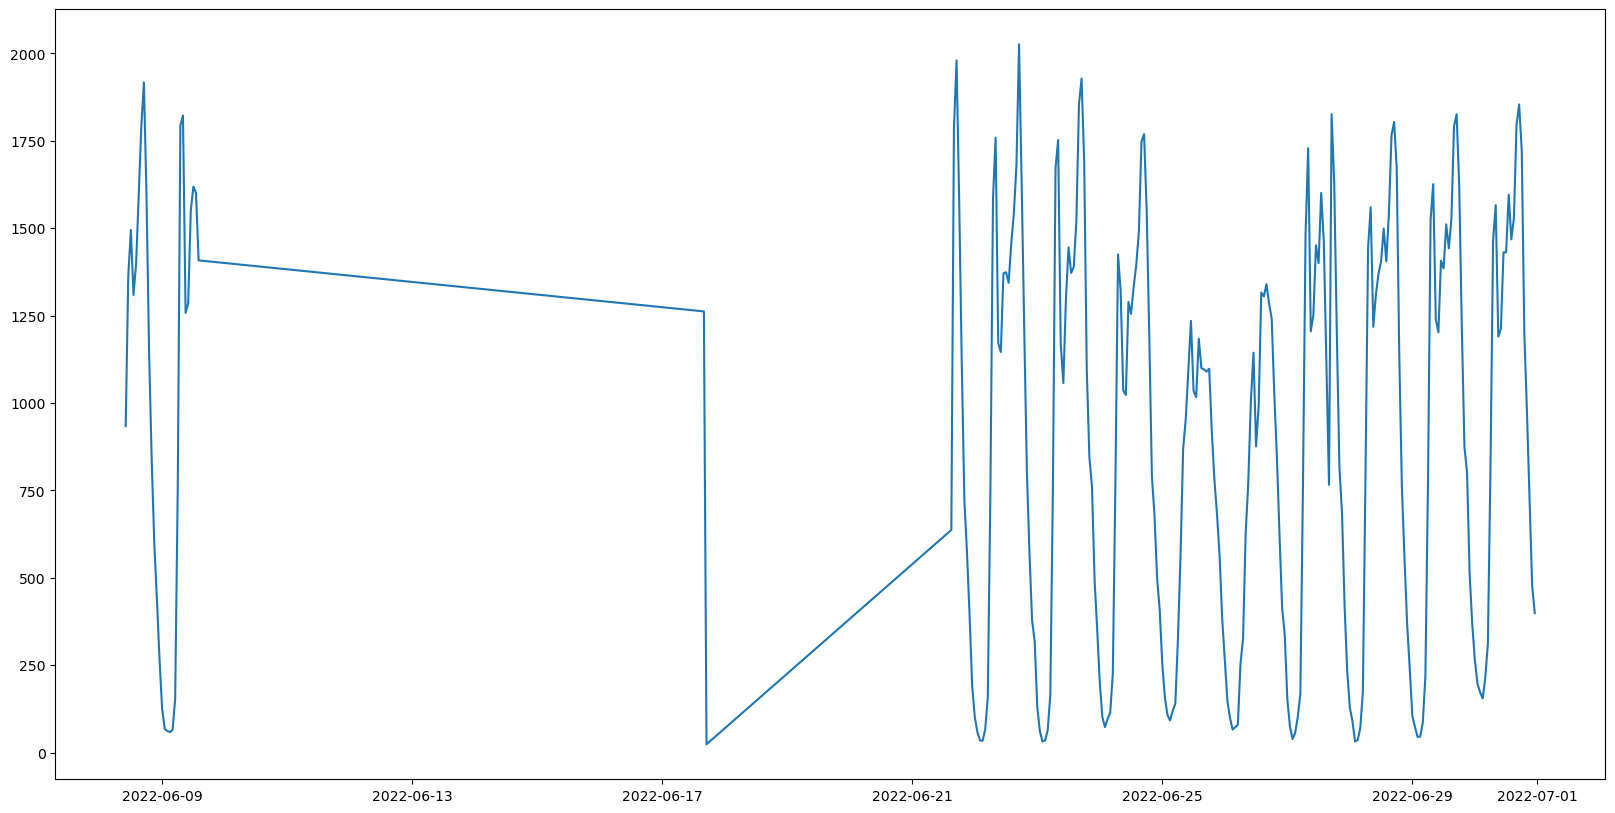

In [10]:
# plot all the data from june bar plot
june_data = df[df.index < '2022-07-01 00:00:00']

# agregate by day
june_data = june_data.groupby(june_data.index).sum()


plt.figure(figsize=(20,10))
plt.plot(june_data.index, june_data['total'])
plt.show()

june_data.head(50)

# data until day 22 is missing!
# take only the vehicle data after 2022-06-22 00:00:00
df = df[df.index > '2022-06-22 00:00:00']

# same for weather data
data_weather = data_weather[data_weather['dt'] >= '2022-06-22 00:00:00']

In [11]:
data_weather

,dt,weather
524,2022-06-22 00:00:00,Rain
525,2022-06-22 00:00:00,Rain
526,2022-06-22 01:00:00,Clouds
527,2022-06-22 02:00:00,Clouds
528,2022-06-22 03:00:00,Clouds
...,...,...
5344,2022-12-31 19:00:00,Clouds
5345,2022-12-31 20:00:00,Clouds
5346,2022-12-31 21:00:00,Rain
5347,2022-12-31 22:00:00,Rain


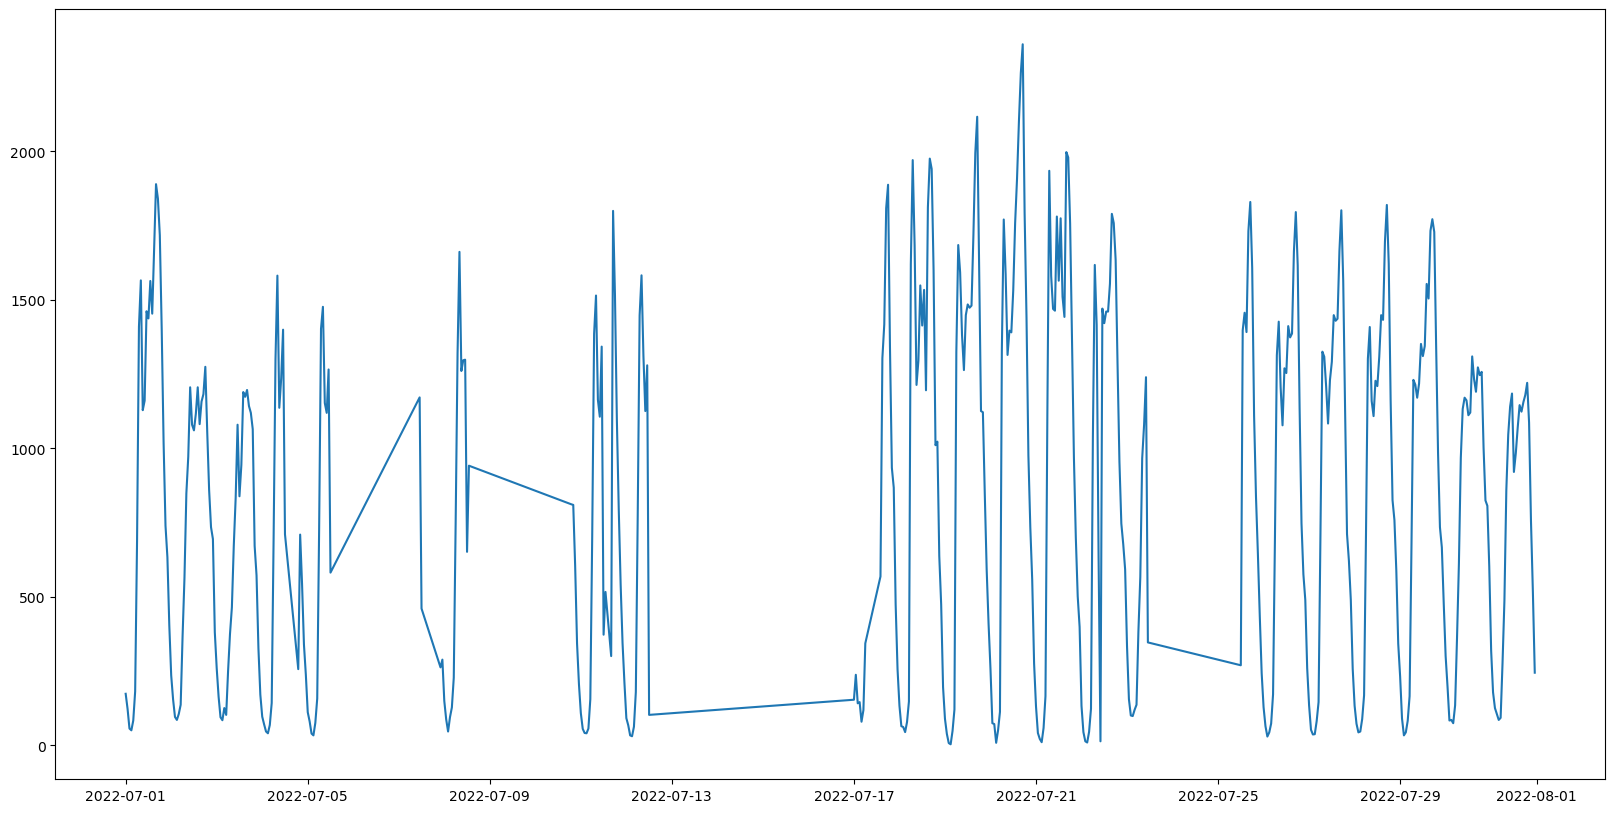

In [12]:
# check for missing values
# how many days go from 2022-06-22 00:00:00 to 2022-12-31 23:00:00 ?
# 193 days
# 193 * 24 = 4632   -> 4632 rows should be in the df
# we only have 3101 rows! -> 1531 missing values

# how many values missing for July
# plot all the data from juLy bar plot
restdata = df[df.index >= '2022-07-01 00:00:00']

july_data = restdata[restdata.index < '2022-08-01 00:00:00']

# agregate by day
july_data = july_data.groupby(july_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(july_data.index, july_data['total'])
plt.show()



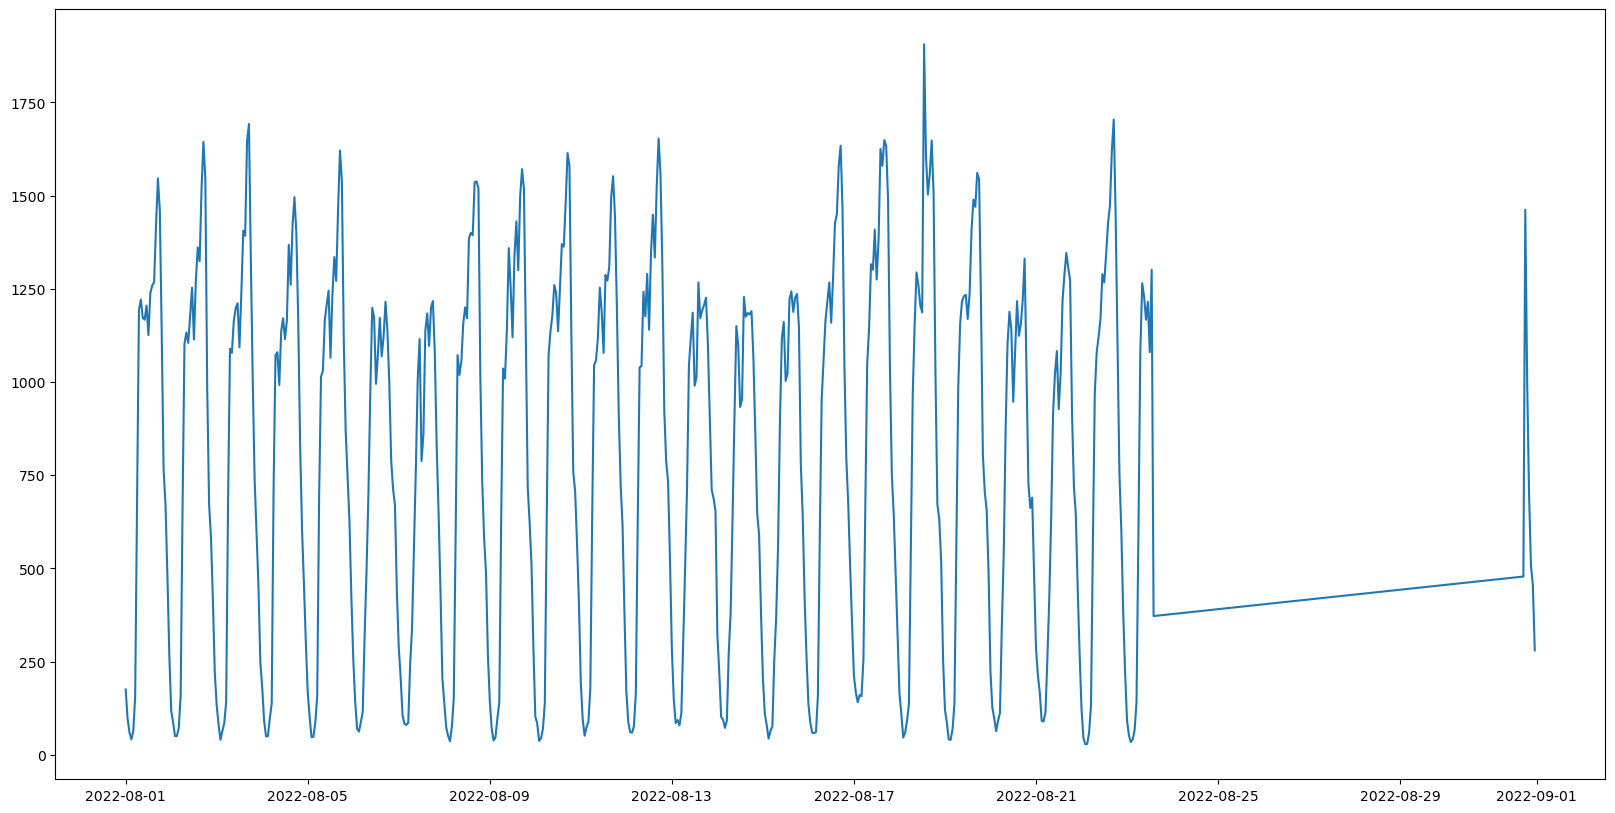

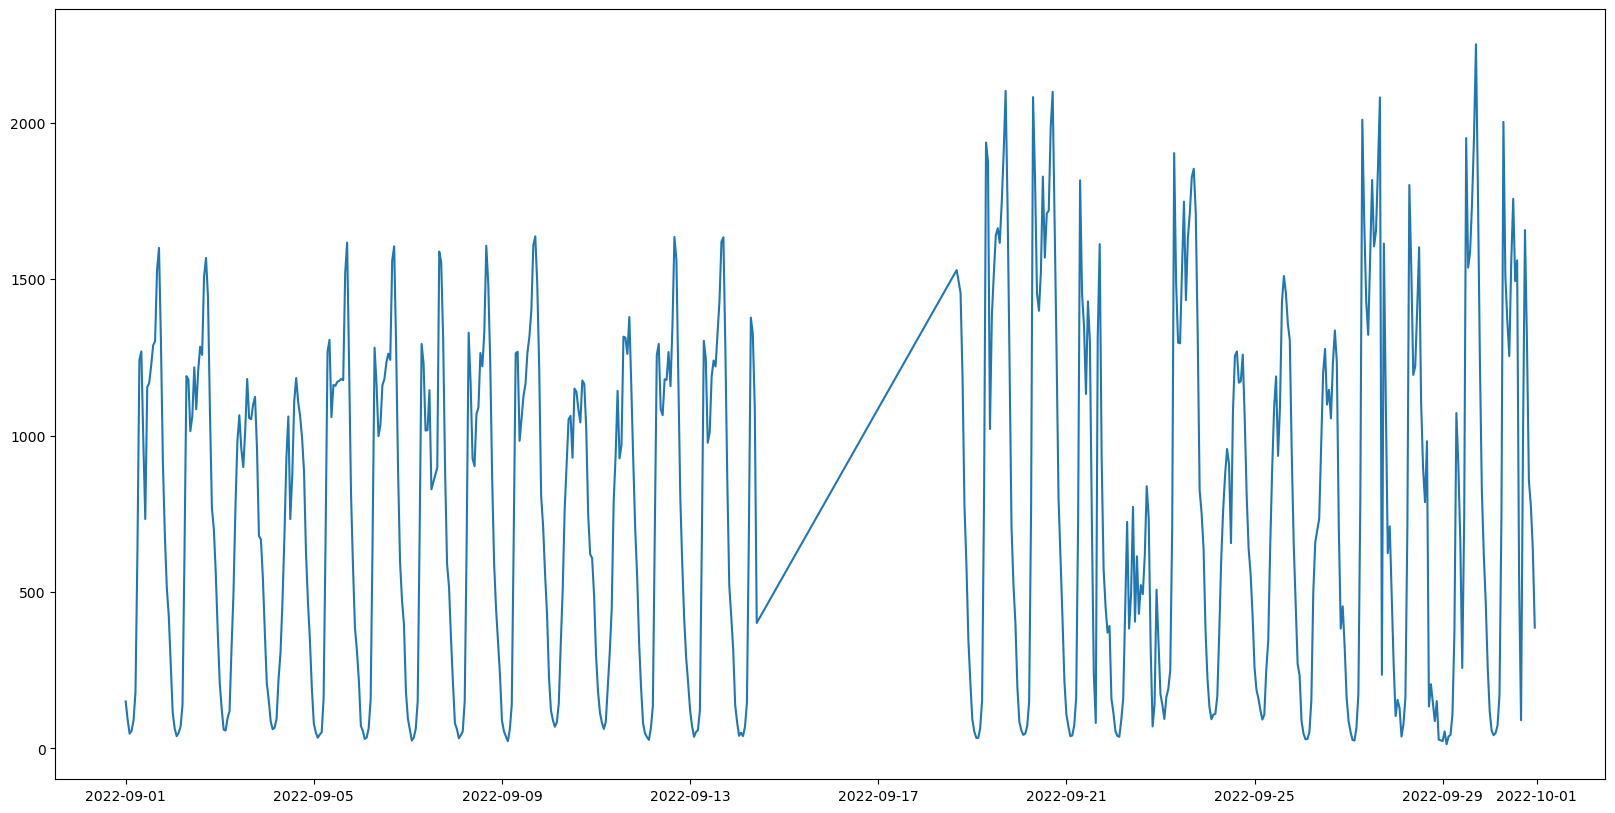

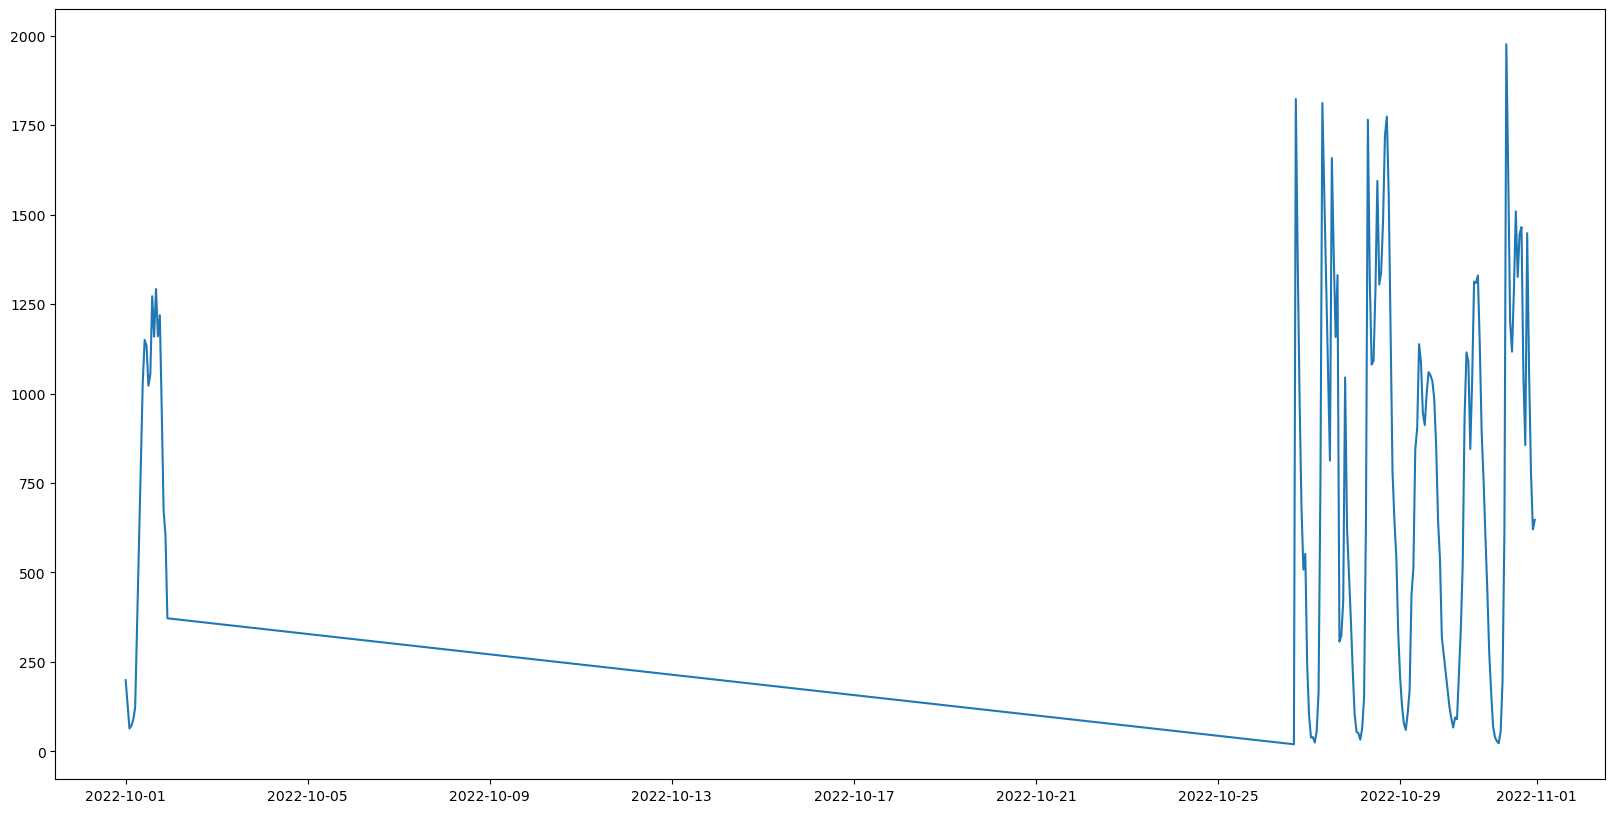

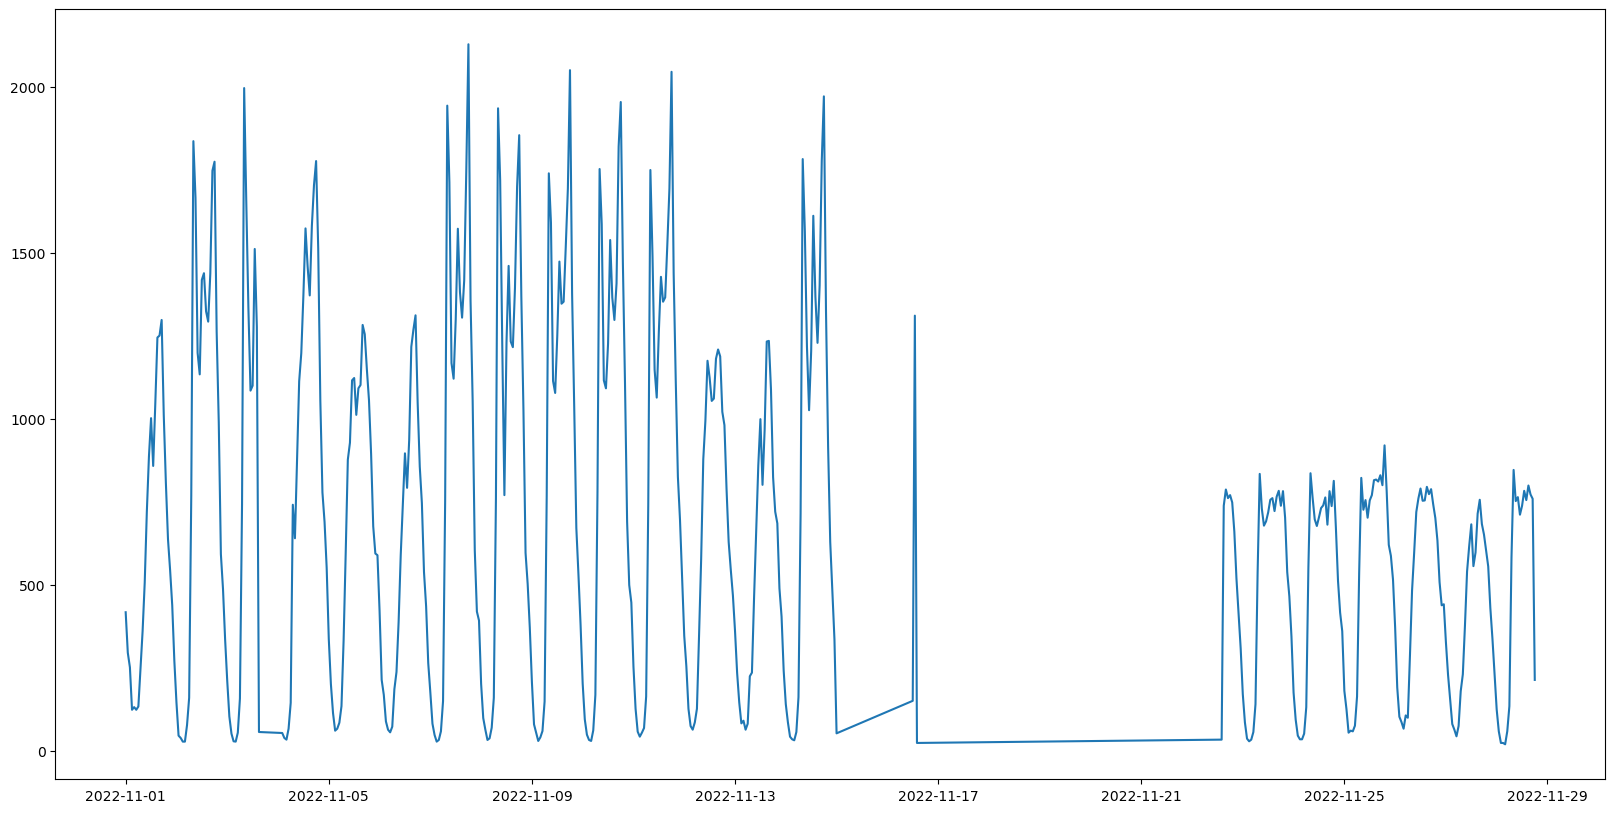

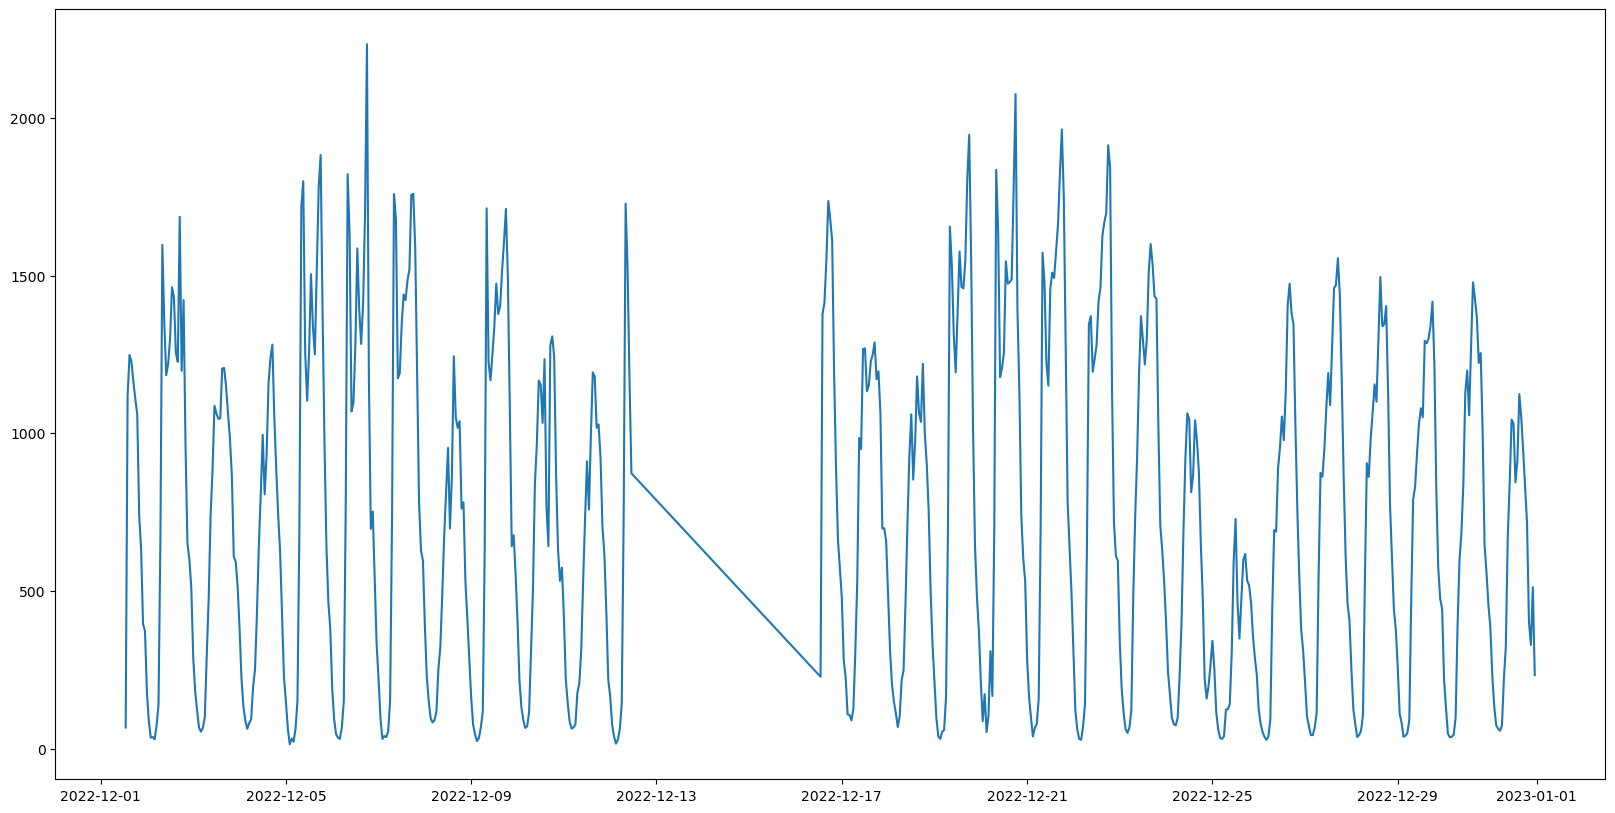

In [13]:
# check for the rest of each month
restdata = df[df.index >= '2022-08-01 00:00:00']

aug_data = restdata[restdata.index < '2022-09-01 00:00:00']

# agregate by day
aug_data = aug_data.groupby(aug_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(aug_data.index, aug_data['total'])
plt.show()


# check for the rest of each month
restdata = df[df.index >= '2022-09-01 00:00:00']

sep_data = restdata[restdata.index < '2022-10-01 00:00:00']

# agregate by day
sep_data = sep_data.groupby(sep_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(sep_data.index, sep_data['total'])
plt.show()


# check for the rest of each month
restdata = df[df.index >= '2022-10-01 00:00:00']
oct_data = restdata[restdata.index < '2022-11-01 00:00:00']

# agregate by day
oct_data = oct_data.groupby(oct_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(oct_data.index, oct_data['total'])
plt.show()


# check for the rest of each month
restdata = df[df.index >= '2022-11-01 00:00:00']
nov_data = restdata[restdata.index < '2022-12-01 00:00:00']

# agregate by day

nov_data = nov_data.groupby(nov_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(nov_data.index, nov_data['total'])
plt.show()


# check for the rest of each month
restdata = df[df.index >= '2022-12-01 00:00:00']
dec_data = restdata[restdata.index <= '2023-12-31 23:00:00']

# agregate by day
dec_data = dec_data.groupby(dec_data.index).sum()

plt.figure(figsize=(20,10))
plt.plot(dec_data.index, dec_data['total'])
plt.show()


### the plots above show clearly the missing values!

In [14]:
# keep only the data from august 1st to august 22

aug_data = aug_data[aug_data.index < '2022-08-23 00:00:00']

aug_data


,vehiclelight,vehicleheavy,vehicleothers,total
day_hour,,,,
2022-08-01 00:00:00,145,9,21,175
2022-08-01 01:00:00,81,6,10,97
2022-08-01 02:00:00,52,6,2,60
2022-08-01 03:00:00,34,2,5,41
2022-08-01 04:00:00,46,6,11,63
...,...,...,...,...
2022-08-22 19:00:00,833,50,215,1098
2022-08-22 20:00:00,527,27,200,754
2022-08-22 21:00:00,459,29,114,602


In [15]:
# now lets check the weather data on the same period (august 1st to august 22)
dd = data_weather[data_weather['dt'] < '2022-08-15 00:00:00']
aug_weather = dd[dd['dt'] >= '2022-08-01 00:00:00']

aug_weather['weather'].value_counts()   # 294 clouds, 255, 1 rain

# what is the timestamp of the rain?
aug_weather[aug_weather['weather'] == 'Rain']
# remove the rain data
aug_weather = aug_weather[aug_weather['weather'] != 'Rain']

aug_weather['weather'].value_counts()   # 294 clouds, 255, 0 rain


Clouds    193
Clear     157
Name: weather, dtype: int64

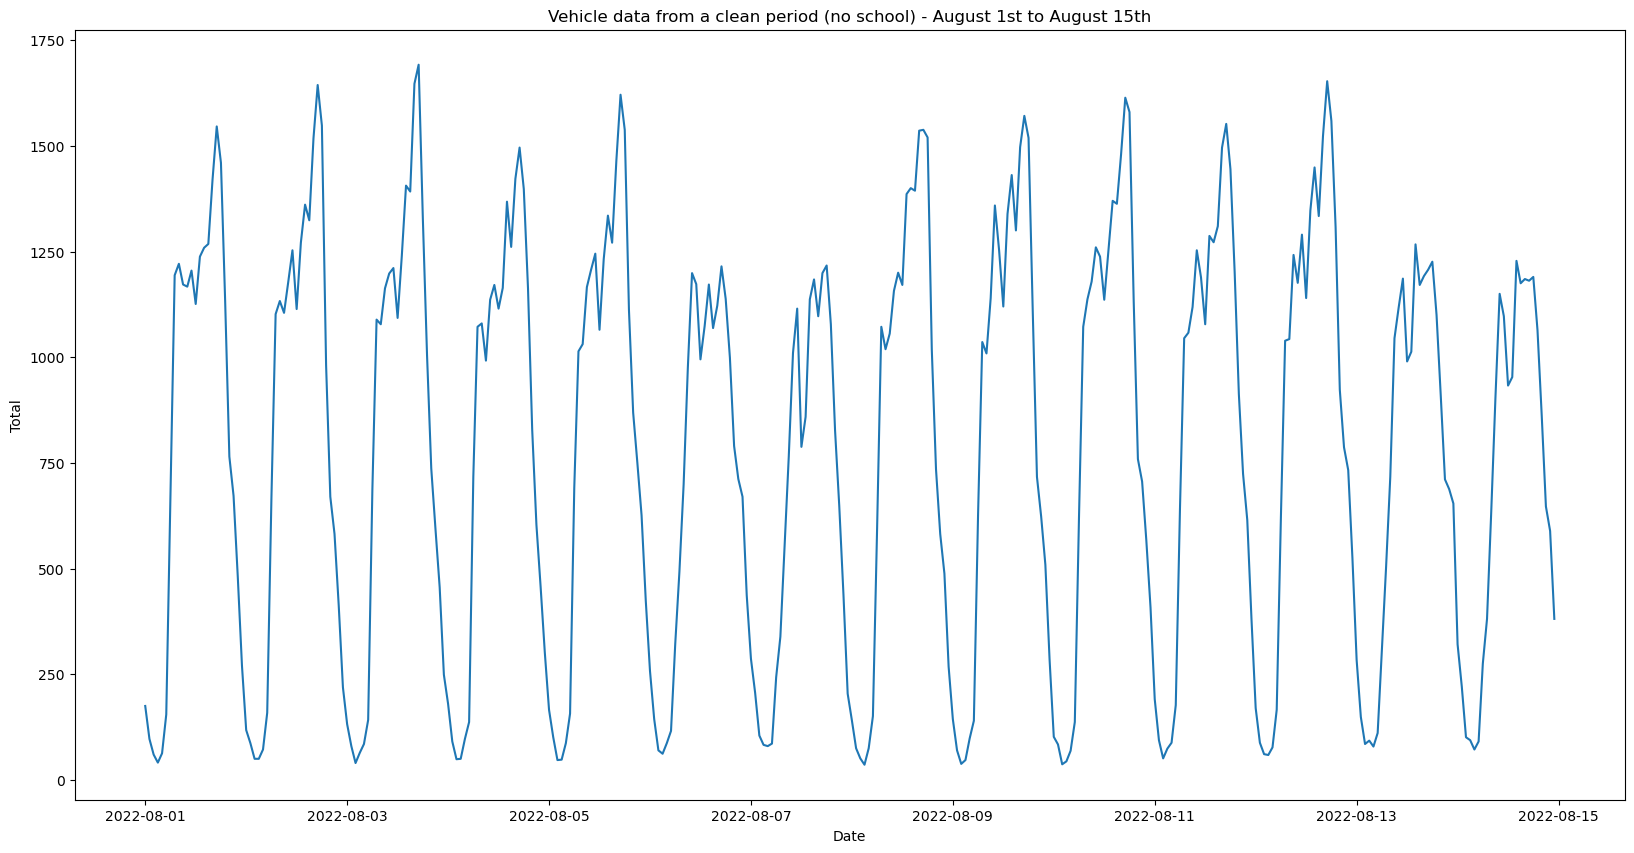

In [16]:
# lets plot the vehicle data and the weather data
aug_data = aug_data[aug_data.index < '2022-08-15 00:00:00']
plt.figure(figsize=(20,10))
plt.plot(aug_data.index, aug_data['total'])
plt.title('Vehicle data from a clean period (no school) - August 1st to August 15th')
plt.xlabel('Date')
plt.ylabel('Total')

plt.show()



,vehiclelight,vehicleheavy,vehicleothers,total
day_hour,,,,
2022-09-18 16:00:00,1220,95,214,1529
2022-09-18 17:00:00,1170,109,215,1494
2022-09-18 18:00:00,1166,108,182,1456
2022-09-18 19:00:00,979,70,142,1191
2022-09-18 20:00:00,615,39,120,774
...,...,...,...,...
2022-10-01 18:00:00,1004,65,150,1219
2022-10-01 19:00:00,802,49,106,957
2022-10-01 20:00:00,566,30,78,674


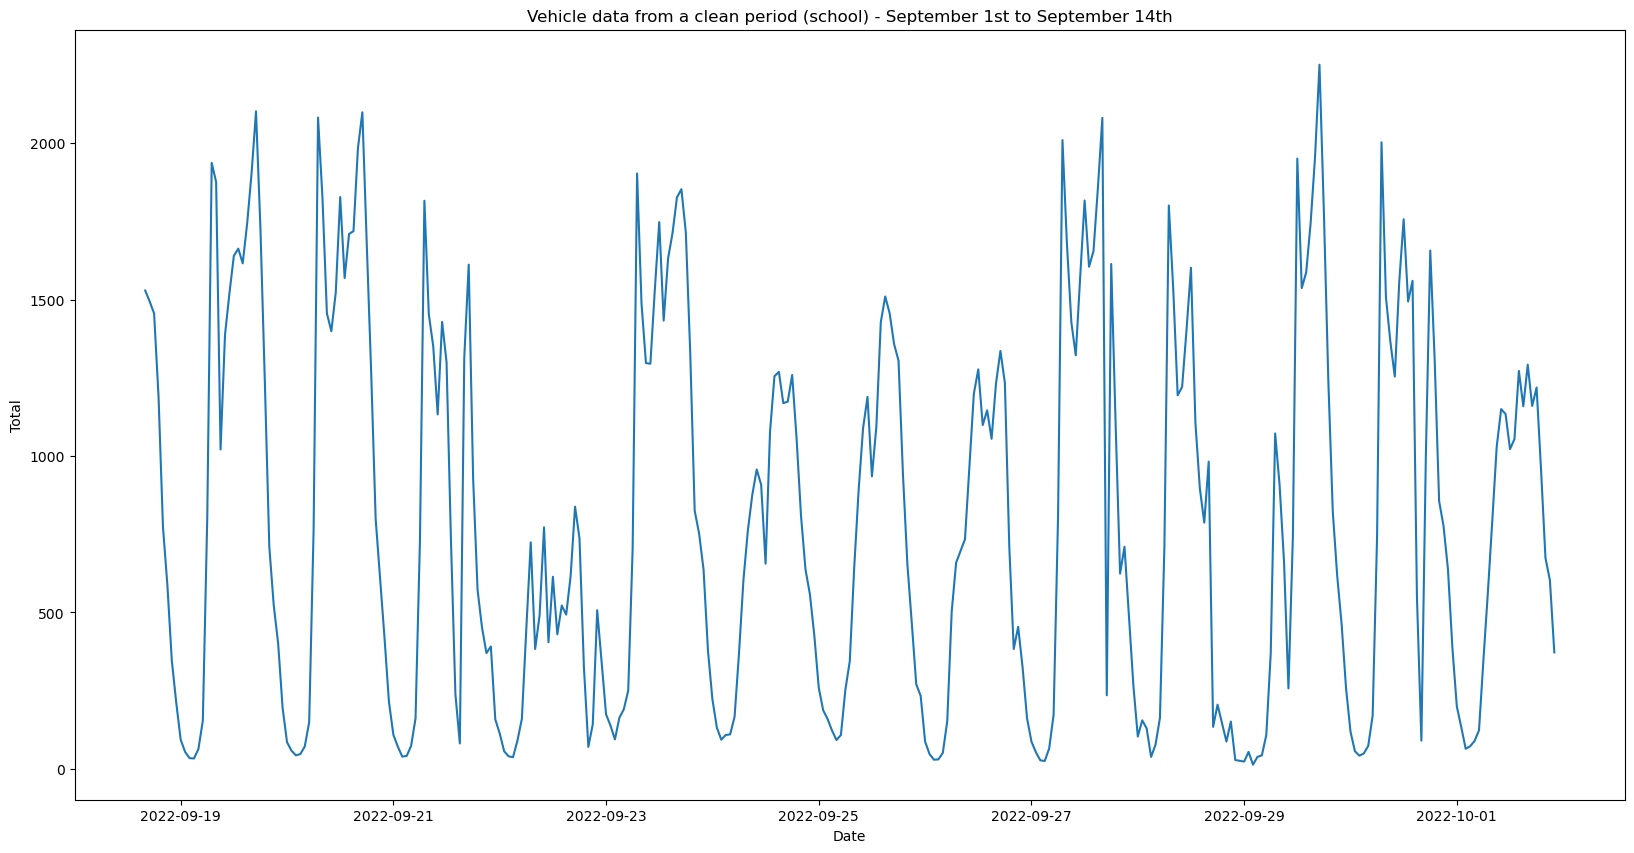

In [17]:
# now we need a clean period with school
# lets check the weather on september 1st to september 14th
dd = data_weather[data_weather['dt'] < '2022-10-02 00:00:00']
sep_weather = dd[dd['dt'] >= '2022-09-17 00:00:00']

sep_weather['weather'].value_counts()   # 269 clouds, 63 clear, 18 rain

# what is the timestamp of the rain?
sep_weather[sep_weather['weather'] == 'Rain']

# remove the rain data
restdata = df[df.index >= '2022-08-01 00:00:00']
sep_data = restdata[restdata.index < '2022-10-02 00:00:00']
sep_data = sep_data[sep_data.index >= '2022-09-17 00:00:00']

# lets plot the vehicle data and the weather data
plt.figure(figsize=(20,10))
plt.plot(sep_data.index, sep_data['total'])
plt.title('Vehicle data from a clean period (school) - September 1st to September 14th')
plt.xlabel('Date')
plt.ylabel('Total')

sep_data

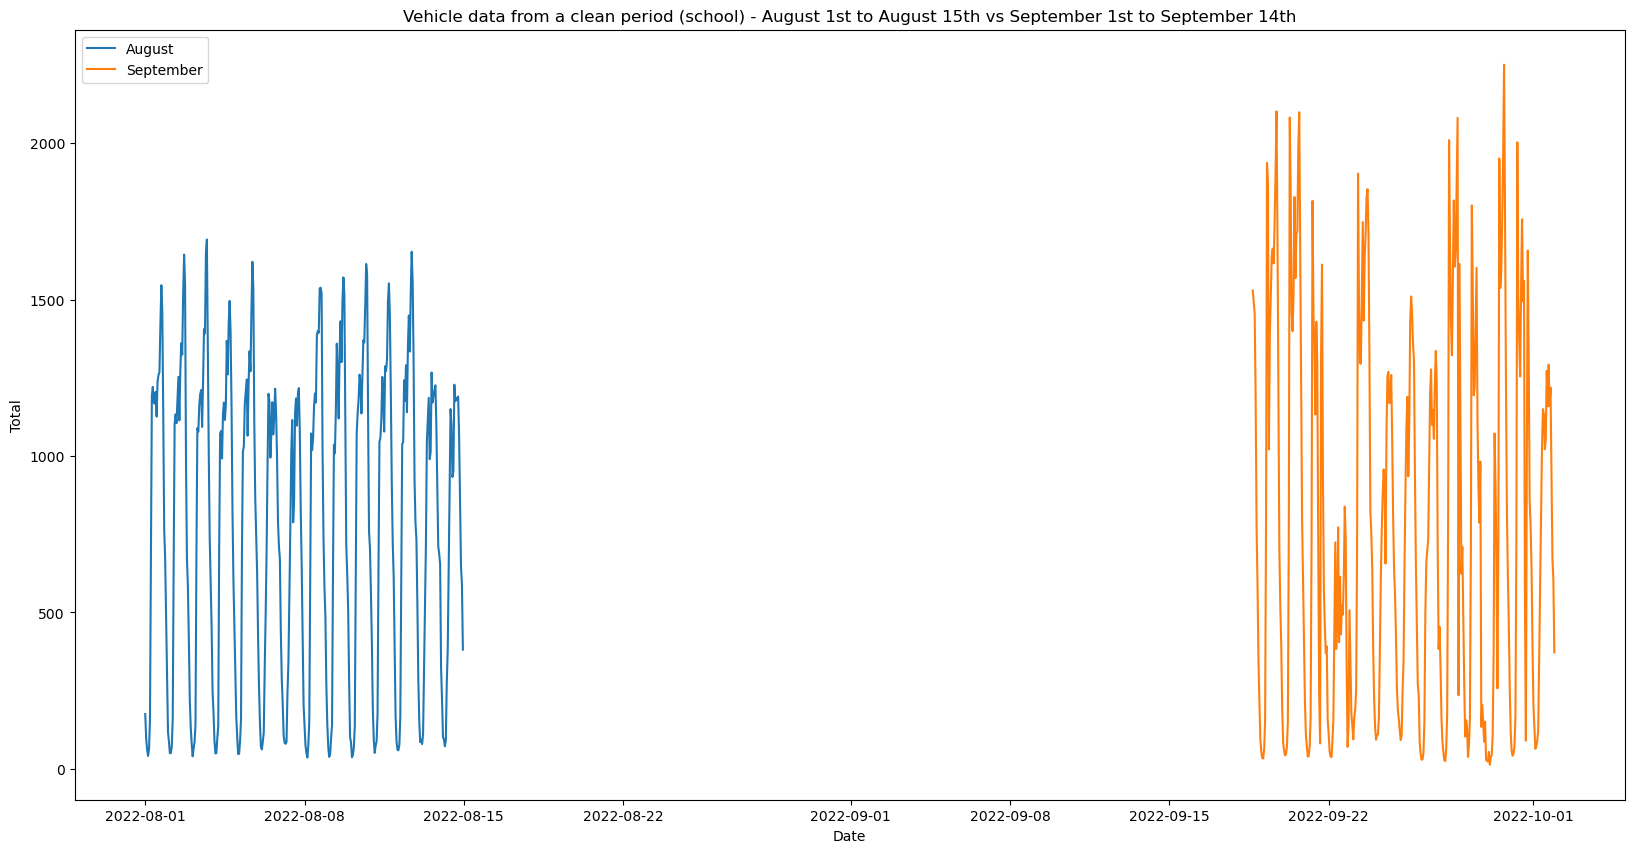

In [18]:
# compare the data from august 1st to august 15th with the data from september 1st to september 14th
plt.figure(figsize=(20,10))
plt.plot(aug_data.index, aug_data['total'], label='August')
plt.plot(sep_data.index, sep_data['total'], label='September')
plt.title('Vehicle data from a clean period (school) - August 1st to August 15th vs September 1st to September 14th')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

In [19]:
# create a new dataframe with the data from august 1st to august 15th
# and make the 1st column the entry time (1, 2, ...) instead of the timestamp
aug_data = aug_data.reset_index()

# create a new column with the entry time
aug_data['entry_time'] = aug_data.index + 1
aug_data



,day_hour,vehiclelight,vehicleheavy,vehicleothers,total,entry_time
0,2022-08-01 00:00:00,145,9,21,175,1
1,2022-08-01 01:00:00,81,6,10,97,2
2,2022-08-01 02:00:00,52,6,2,60,3
3,2022-08-01 03:00:00,34,2,5,41,4
4,2022-08-01 04:00:00,46,6,11,63,5
...,...,...,...,...,...,...
331,2022-08-14 19:00:00,870,57,137,1064,332
332,2022-08-14 20:00:00,736,29,98,863,333
333,2022-08-14 21:00:00,549,25,73,647,334
334,2022-08-14 22:00:00,496,24,69,589,335


In [20]:
# create a new dataframe with the data from september 17th to october 1st
# and make the 1st column the entry time (1, 2, ...) instead of the timestamp
sep_data = sep_data.reset_index()

# create a new column with the entry time
sep_data['entry_time'] = sep_data.index + 1
sep_data


,day_hour,vehiclelight,vehicleheavy,vehicleothers,total,entry_time
0,2022-09-18 16:00:00,1220,95,214,1529,1
1,2022-09-18 17:00:00,1170,109,215,1494,2
2,2022-09-18 18:00:00,1166,108,182,1456,3
3,2022-09-18 19:00:00,979,70,142,1191,4
4,2022-09-18 20:00:00,615,39,120,774,5
...,...,...,...,...,...,...
311,2022-10-01 18:00:00,1004,65,150,1219,312
312,2022-10-01 19:00:00,802,49,106,957,313
313,2022-10-01 20:00:00,566,30,78,674,314
314,2022-10-01 21:00:00,519,22,62,603,315


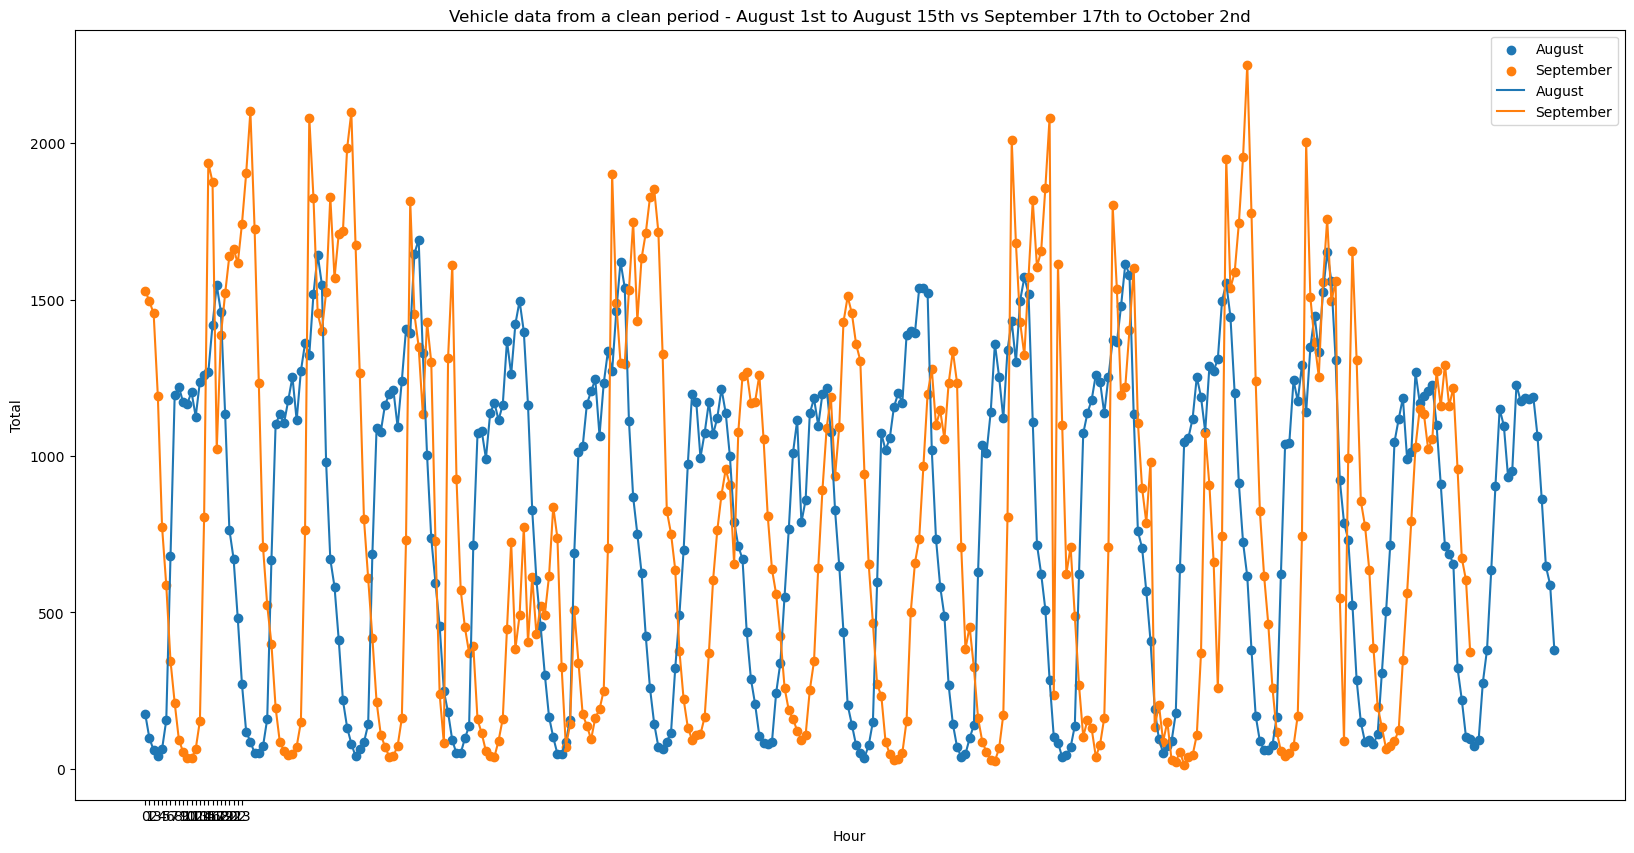

In [21]:
# agregate by hour
aug_data = aug_data.groupby(aug_data.index).sum()
sep_data = sep_data.groupby(sep_data.index).sum()

# keep only the hour 

# plot the data show the points 
plt.figure(figsize=(20,10))
plt.scatter(aug_data.index, aug_data['total'], label='August')
plt.scatter(sep_data.index, sep_data['total'], label='September')
plt.plot(aug_data.index, aug_data['total'], label='August')
plt.plot(sep_data.index, sep_data['total'], label='September')
plt.title('Vehicle data from a clean period - August 1st to August 15th vs September 17th to October 2nd')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()




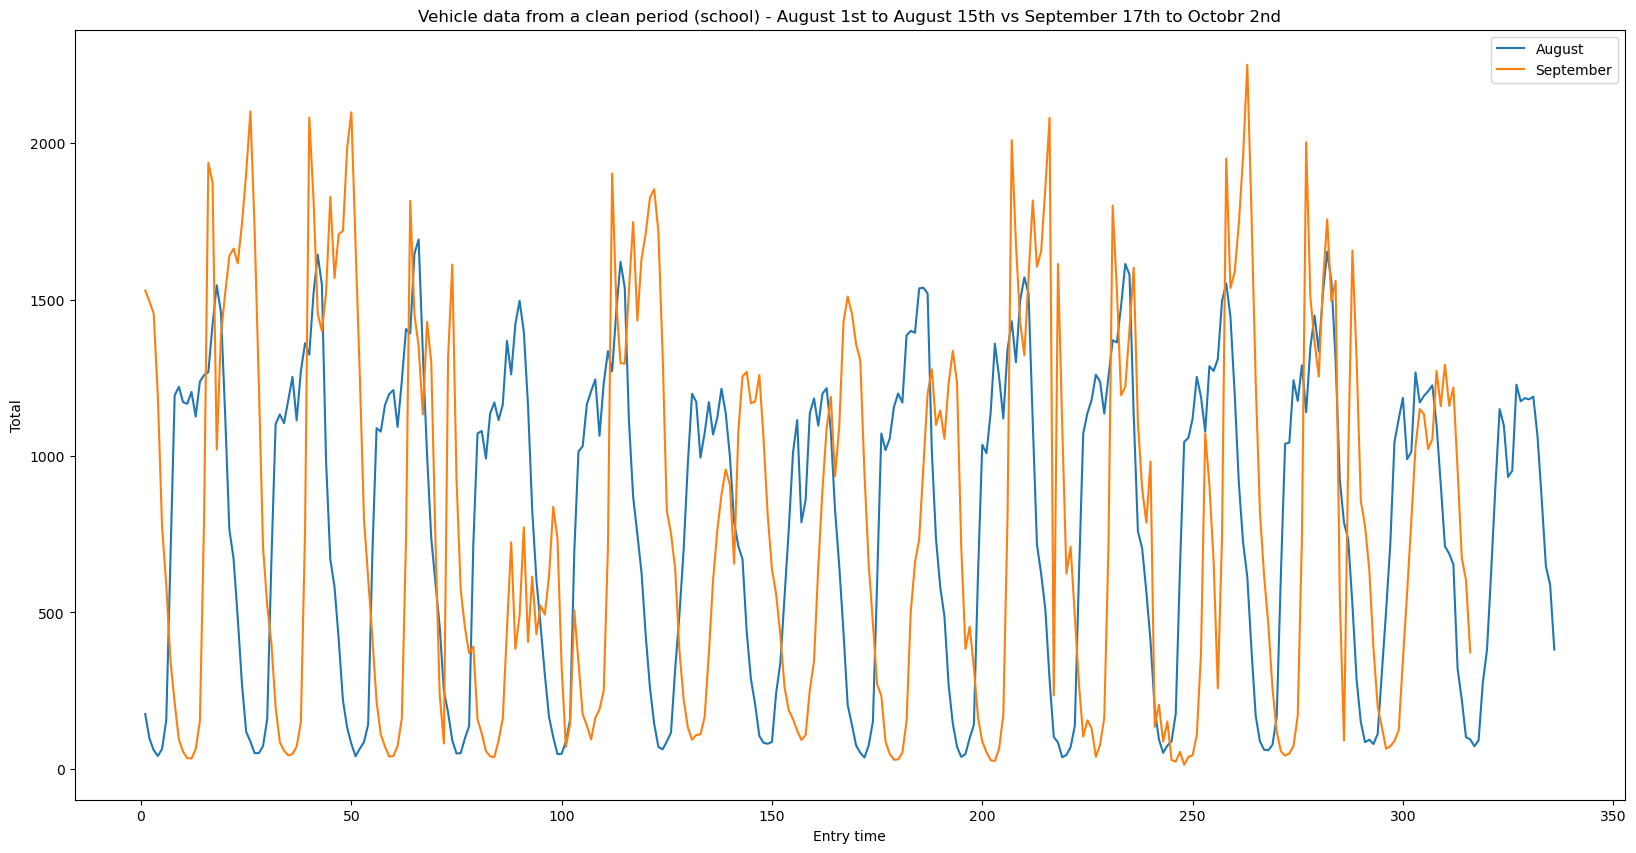

In [22]:
# plot the data from aug_data
# plot the data from sep_data
plt.figure(figsize=(20,10))
plt.plot(aug_data['entry_time'], aug_data['total'], label='August')
plt.plot(sep_data['entry_time'], sep_data['total'], label='September')
plt.title('Vehicle data from a clean period (school) - August 1st to August 15th vs September 17th to Octobr 2nd')
plt.xlabel('Entry time')
plt.ylabel('Total')
plt.legend()
plt.show()



# good weather school vs good weather no school;

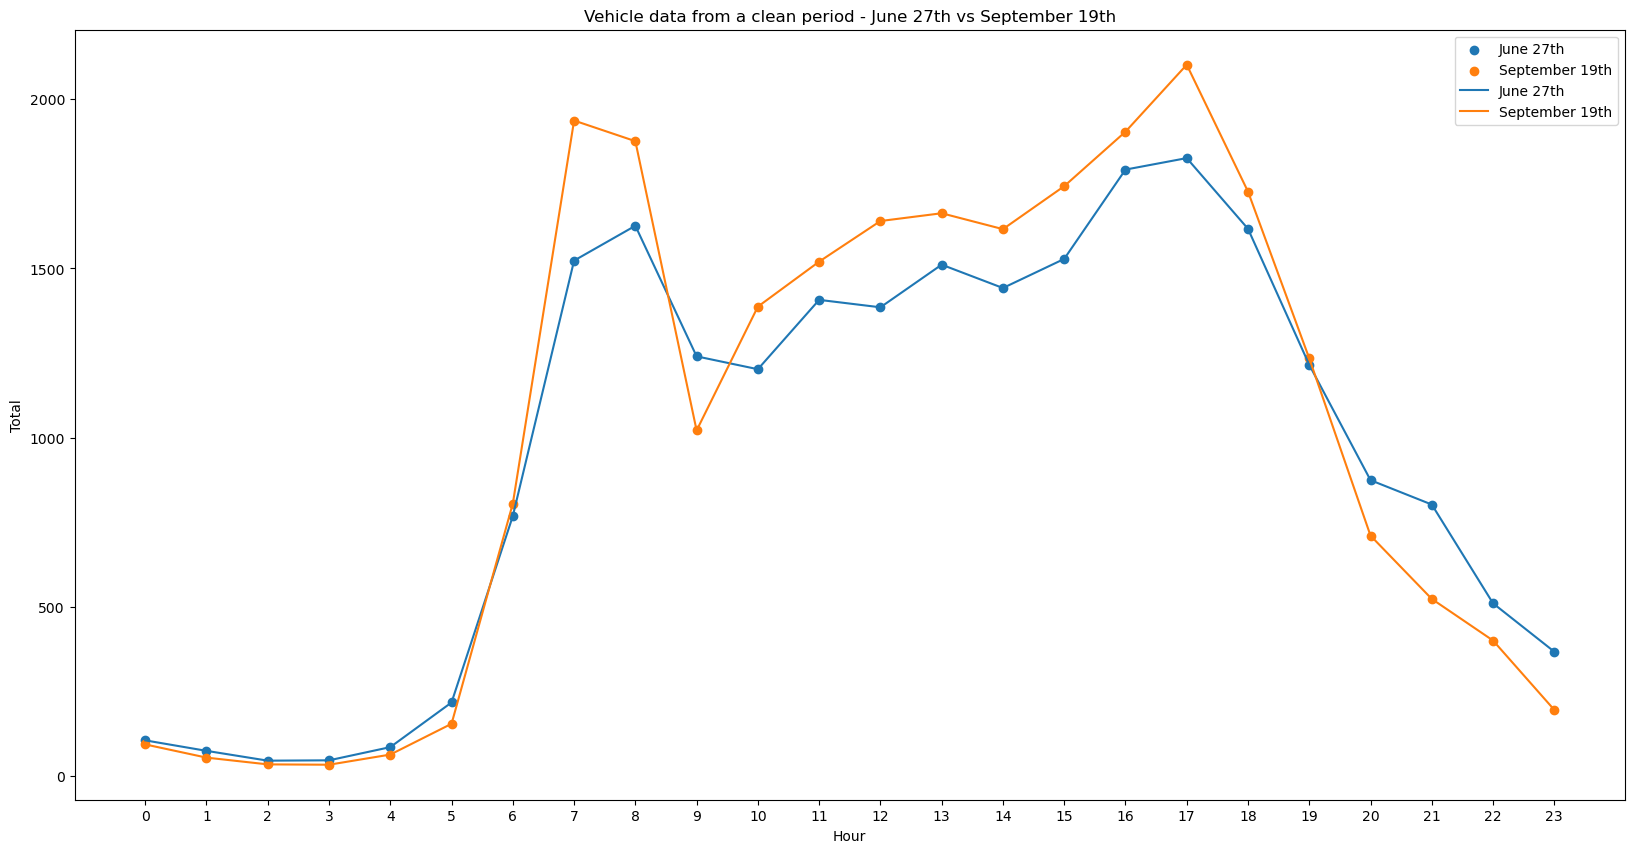

In [23]:
# lets take the data from June 27th and the data from September 27th
# and compare them


x = df[df.index >= '2022-06-29 00:00:00']
data_june27 = x[x.index < '2022-06-30 00:00:00']

x = df[df.index >= '2022-09-19 00:00:00']
data_sept19 = x[x.index < '2022-09-20 00:00:00']

# agregate by hour
data_june27 = data_june27.groupby(data_june27.index).sum()
data_june27

data_sept19 = data_sept19.groupby(data_sept19.index).sum()
data_sept19

# now lets plot by hour
# keep only the hour value
# convert the index to datetime
data_june27.index = pd.to_datetime(data_june27.index, format='%H')
data_sept19.index = pd.to_datetime(data_sept19.index, format='%H')

data_june27.index = data_june27.index.hour
data_sept19.index = data_sept19.index.hour

# plot the data show the points
plt.figure(figsize=(20,10))
plt.scatter(data_june27.index, data_june27['total'], label='June 27th')
plt.scatter(data_sept19.index, data_sept19['total'], label='September 19th')
plt.plot(data_june27.index, data_june27['total'], label='June 27th')
plt.plot(data_sept19.index, data_sept19['total'], label='September 19th')
plt.title('Vehicle data from a clean period - June 27th vs September 19th')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()


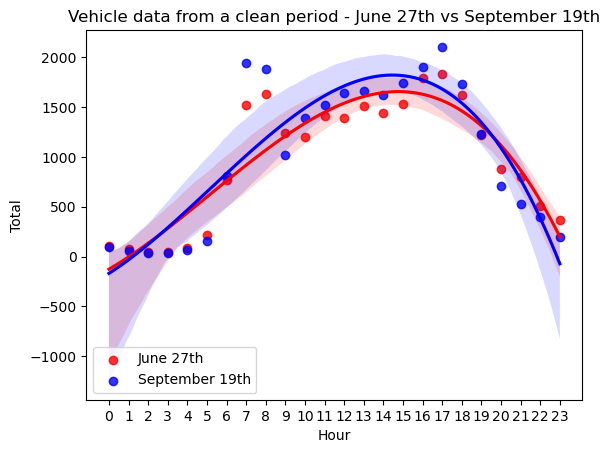

In [24]:
import seaborn as sns

sns.regplot(x=data_june27.index, y=data_june27['total'], data=data_june27, label='June 27th', color='red', marker='o', order=3)
sns.regplot(x=data_sept19.index, y=data_sept19['total'], data=data_sept19, label='September 19th', color='blue', marker='o', order=3)
plt.title('Vehicle data from a clean period - June 27th vs September 19th')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()


# good weather school vs bad weather school;

In [25]:
# check the weather on 19th of september

we = data_weather[data_weather['dt'] >= '2022-09-19 00:00:00']
we = we[we['dt'] < '2022-09-20 00:00:00']
we


,dt,weather
2749,2022-09-19 00:00:00,Clouds
2750,2022-09-19 00:00:00,Clouds
2751,2022-09-19 01:00:00,Clouds
2752,2022-09-19 02:00:00,Clouds
2753,2022-09-19 03:00:00,Clouds
2754,2022-09-19 04:00:00,Clouds
2755,2022-09-19 05:00:00,Clouds
2756,2022-09-19 06:00:00,Clouds
2757,2022-09-19 07:00:00,Clouds
2758,2022-09-19 08:00:00,Clouds


In [26]:
# check the weather on December 
we = data_weather[data_weather['dt'] >= '2022-12-01 00:00:00']
we = we[we['dt'] < '2022-12-31 00:00:00']
we['weather'].value_counts()

# show rain
we[we['weather'] == 'Rain'].head(50)



,dt,weather
4679,2022-12-05 04:00:00,Rain
4686,2022-12-05 11:00:00,Rain
4742,2022-12-07 17:00:00,Rain
4745,2022-12-07 20:00:00,Rain
4746,2022-12-07 21:00:00,Rain
4747,2022-12-07 22:00:00,Rain
4748,2022-12-07 23:00:00,Rain
4749,2022-12-08 00:00:00,Rain
4750,2022-12-08 00:00:00,Rain
4751,2022-12-08 01:00:00,Rain


In [27]:
# check the weather on November

x = data_weather[data_weather['dt'] >= '2022-11-01 00:00:00']
x = x[x['dt'] < '2022-11-15 00:00:00']
x['weather'].value_counts()

# keep only the rain data
x = x[x['weather'] == 'Rain']
x 


,dt,weather
3872,2022-11-02 22:00:00,Rain
3873,2022-11-02 23:00:00,Rain
3874,2022-11-03 00:00:00,Rain
3875,2022-11-03 00:00:00,Rain
3876,2022-11-03 01:00:00,Rain
3877,2022-11-03 02:00:00,Rain
3878,2022-11-03 03:00:00,Rain
3879,2022-11-03 04:00:00,Rain
3880,2022-11-03 05:00:00,Rain
3881,2022-11-03 06:00:00,Rain


In [28]:
# 13th December # terça-feira
# get the weather data for the 13th of december

x = data_weather[data_weather['dt'] >= '2022-12-19 00:00:00']
x = x[x['dt'] < '2022-12-20 00:00:00']

# keep only the rain data
x = x[x['weather'] == 'Rain']
x



,dt,weather
5027,2022-12-19 02:00:00,Rain
5041,2022-12-19 16:00:00,Rain
5042,2022-12-19 17:00:00,Rain
5045,2022-12-19 20:00:00,Rain


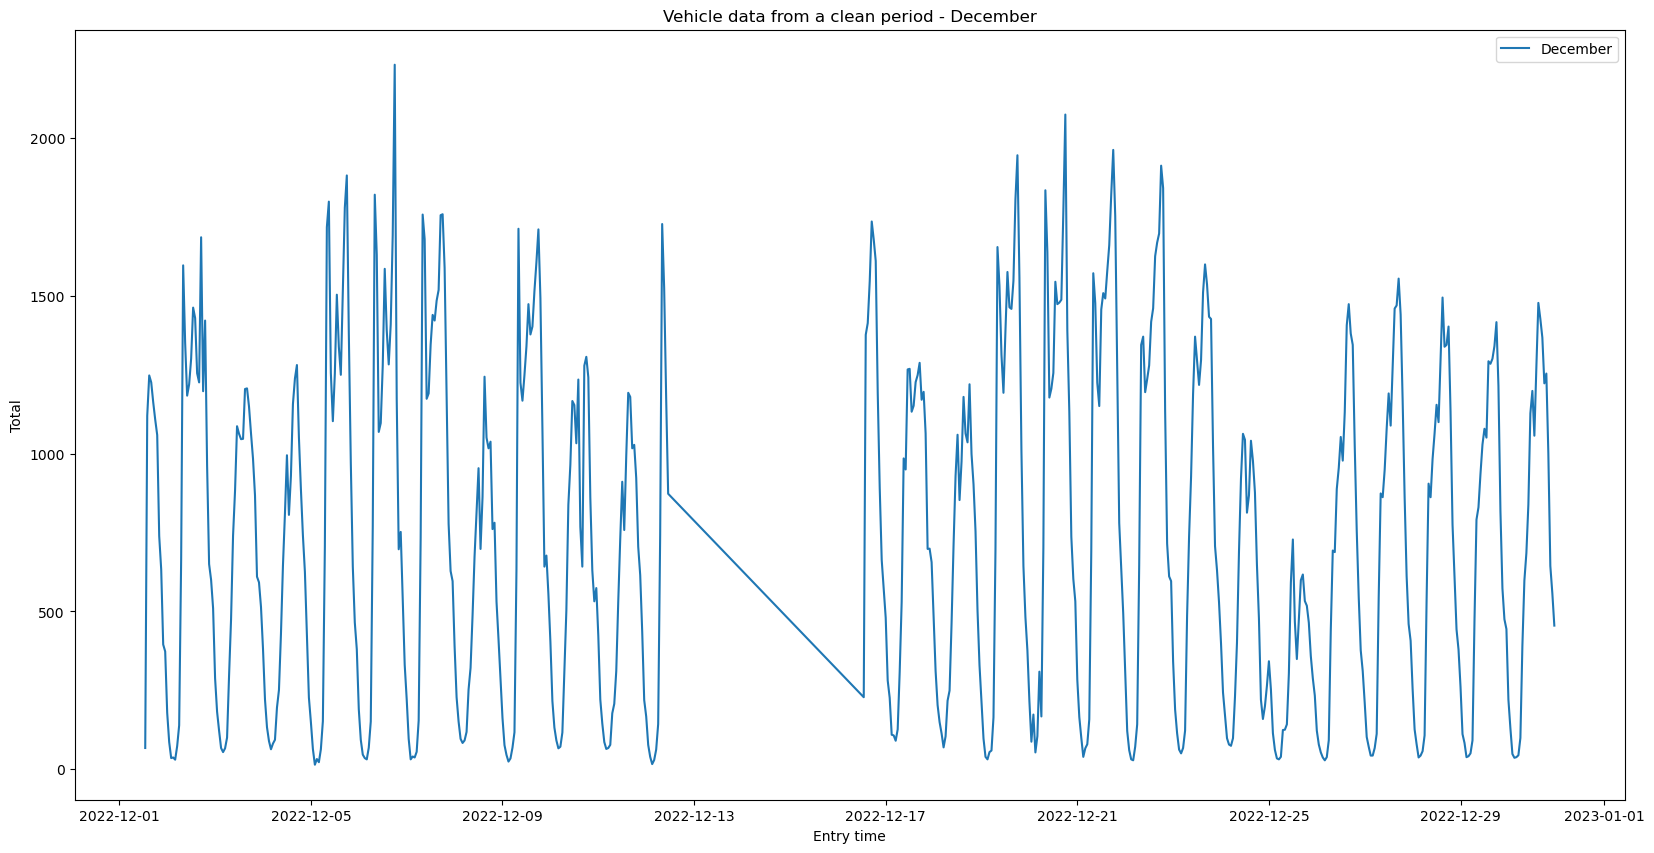

In [29]:
# show the vehicle data for december 
x = df[df.index >= '2022-12-01 00:00:00']
x = x[x.index < '2022-12-31 00:00:00']
x = x.groupby(x.index).sum()
x

# plot
plt.figure(figsize=(20,10))
plt.plot(x['total'], label='December')
plt.title('Vehicle data from a clean period - December')
plt.xlabel('Entry time')
plt.ylabel('Total')
plt.legend()
plt.show()


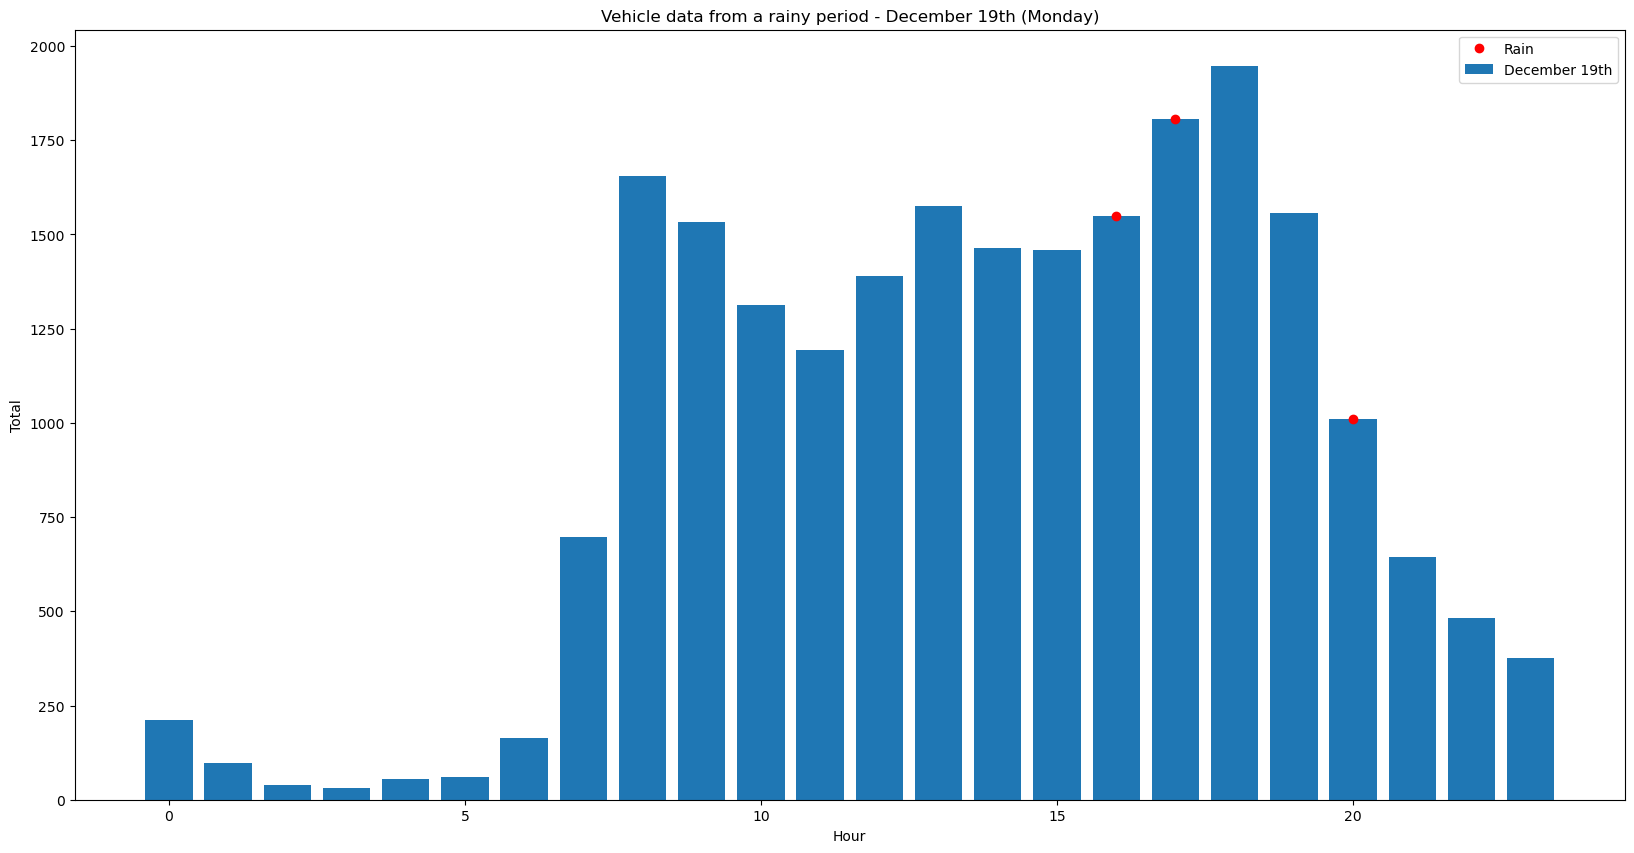

In [30]:
# get the vehicle data for the 13th of december
dec_19 = df[df.index > '2022-12-18 23:00:00']
dec_19 = dec_19[dec_19.index < '2022-12-20 00:00:00']
dec_19 = dec_19.groupby(dec_19.index).sum()
dec_19

# agregate by hour
dec_19.index = pd.to_datetime(dec_19.index, format='%H')
dec_19.index = dec_19.index.hour
dec_19


# plot
plt.figure(figsize=(20,10))
plt.bar(dec_19.index, dec_19['total'], label='December 19th')
# make the line red for the rain (hours: 16, 17, 20 )
plt.plot([16, 17, 20], [dec_19['total'][16], dec_19['total'][17], dec_19['total'][20]], 'ro', label='Rain')
plt.title('Vehicle data from a rainy period - December 19th (Monday)')
plt.xlabel('Hour') 
plt.ylabel('Total')
plt.legend()
plt.show()



In [31]:
# get weather for december 12th
x = data_weather[data_weather['dt'] >= '2022-12-11 00:00:00']
x = x[x['dt'] < '2022-12-12 00:00:00']
x



,dt,weather
4824,2022-12-11 00:00:00,Rain
4825,2022-12-11 00:00:00,Rain
4826,2022-12-11 01:00:00,Rain
4827,2022-12-11 02:00:00,Clouds
4828,2022-12-11 03:00:00,Rain
4829,2022-12-11 04:00:00,Clouds
4830,2022-12-11 05:00:00,Clouds
4831,2022-12-11 06:00:00,Clouds
4832,2022-12-11 07:00:00,Clouds
4833,2022-12-11 08:00:00,Clouds


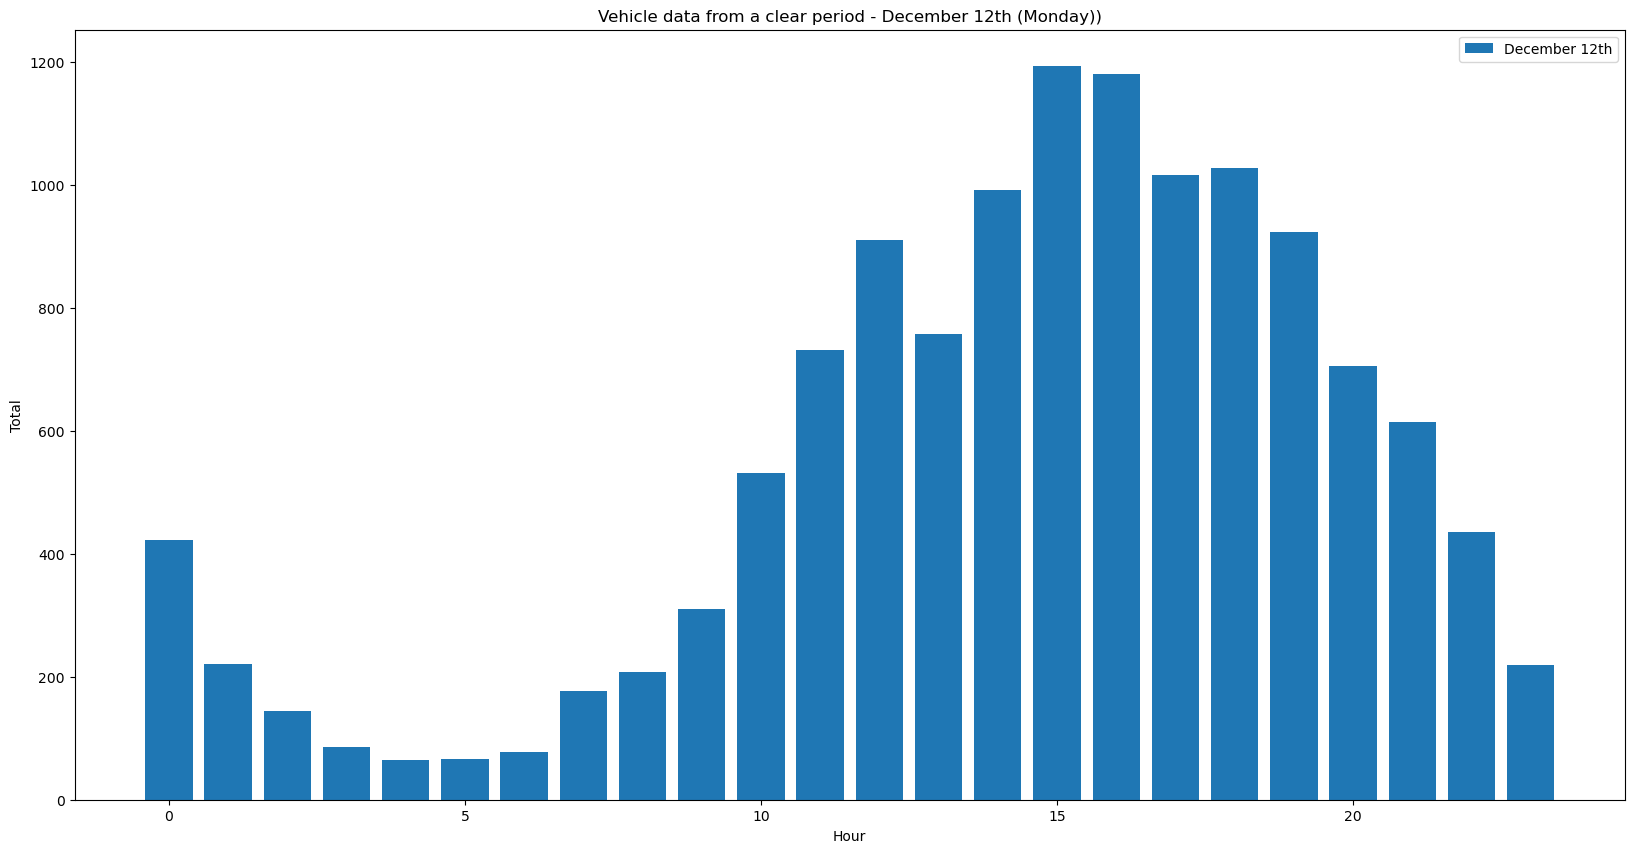

In [32]:
# get the vehicle data for the 11th of december
dec_12 = df[df.index > '2022-12-10 23:00:00']
dec_12 = dec_12[dec_12.index < '2022-12-12 00:00:00']
dec_12 = dec_12.groupby(dec_12.index).sum()
dec_12


# agregate by hour
dec_12.index = pd.to_datetime(dec_12.index, format='%H')
dec_12.index = dec_12.index.hour
dec_12


# plot
plt.figure(figsize=(20,10))
plt.bar(dec_12.index, dec_12['total'], label='December 12th')
plt.title('Vehicle data from a clear period - December 12th (Monday))')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.legend()
plt.show()


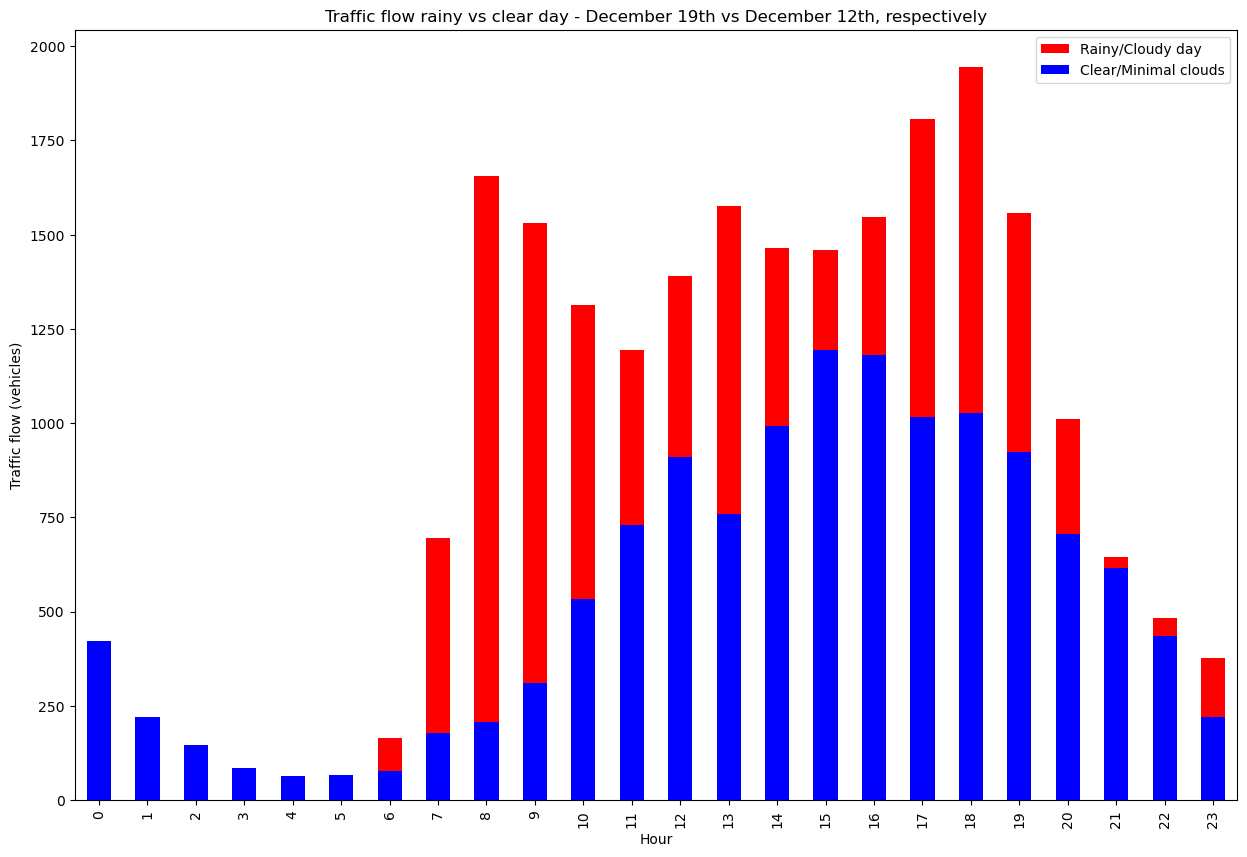

In [33]:
# compare traffic flow during school vs no school vehiclelight

dec_19.groupby(dec_19.index).sum()['total'].plot(kind='bar', legend=True, figsize=(15, 10), color='red')
dec_12.groupby(dec_12.index).sum()['total'].plot(kind='bar', legend=True, figsize=(15, 10), color='blue')
plt.title('Traffic flow rainy vs clear day - December 19th vs December 12th, respectively')
plt.legend(['Rainy/Cloudy day', 'Clear/Minimal clouds'])
plt.xlabel('Hour')
plt.ylabel('Traffic flow (vehicles)')
plt.show()

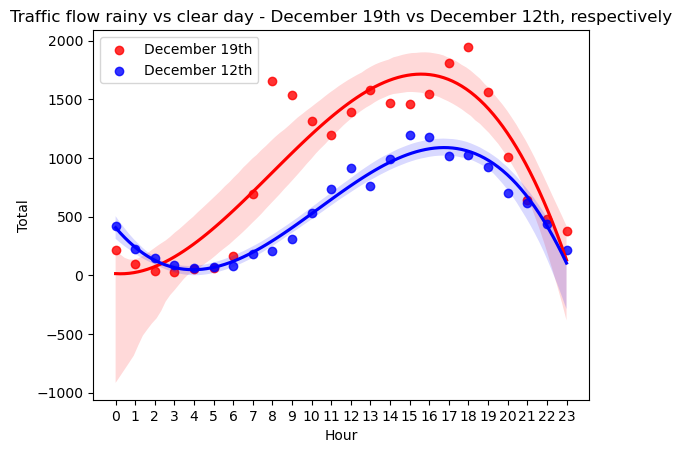

In [34]:
import seaborn as sns

sns.regplot(x=dec_19.index, y=dec_19['total'], data=dec_19, label='December 19th', color='red', marker='o', order=3)
sns.regplot(x=dec_12.index, y=dec_12['total'], data=dec_12, label='December 12th', color='blue', marker='o', order=3)
plt.title('Traffic flow rainy vs clear day - December 19th vs December 12th, respectively')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()



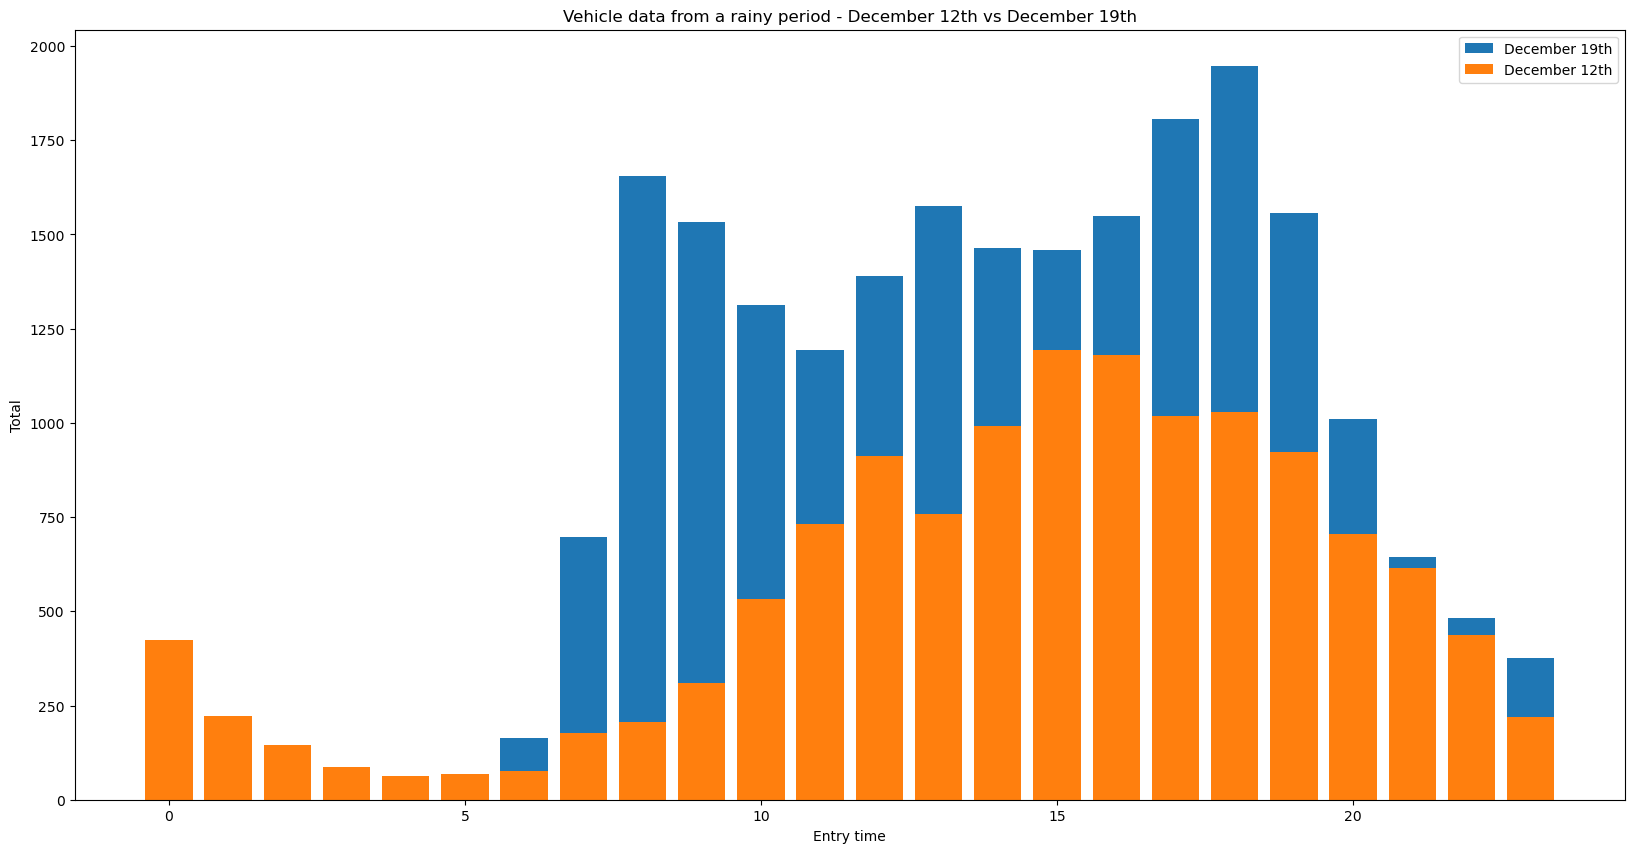

,vehiclelight,vehicleheavy,vehicleothers,total
day_hour,,,,
0,287,29,107,423
1,139,12,70,221
2,117,2,26,145
3,65,3,18,86
4,47,6,11,64
5,45,3,19,67
6,51,4,22,77
7,116,6,55,177
8,144,8,55,207


In [35]:
# plot the data of the 12th and 19th of december
# make a bar plot comparing each hour
plt.figure(figsize=(20,10))
plt.bar(dec_19.index, dec_19['total'], label='December 19th')
plt.bar(dec_12.index, dec_12['total'], label='December 12th')
plt.title('Vehicle data from a rainy period - December 12th vs December 19th')
plt.xlabel('Entry time')
plt.ylabel('Total')
plt.legend()
plt.show()
    
dec_12

# good weather no school vs bad weather no school;

In [36]:
# check the weather on December
we = data_weather[data_weather['dt'] >= '2022-12-20 00:00:00']
we = we[we['dt'] <= '2022-12-31 00:00:00']
we['weather'].value_counts()

# show rain
we[we['weather'] == 'Rain'].head(50)


,dt,weather
5053,2022-12-20 03:00:00,Rain
5054,2022-12-20 04:00:00,Rain
5055,2022-12-20 05:00:00,Rain
5056,2022-12-20 06:00:00,Rain
5057,2022-12-20 07:00:00,Rain
5062,2022-12-20 12:00:00,Rain
5078,2022-12-21 03:00:00,Rain
5093,2022-12-21 18:00:00,Rain
5174,2022-12-25 00:00:00,Rain
5175,2022-12-25 00:00:00,Rain


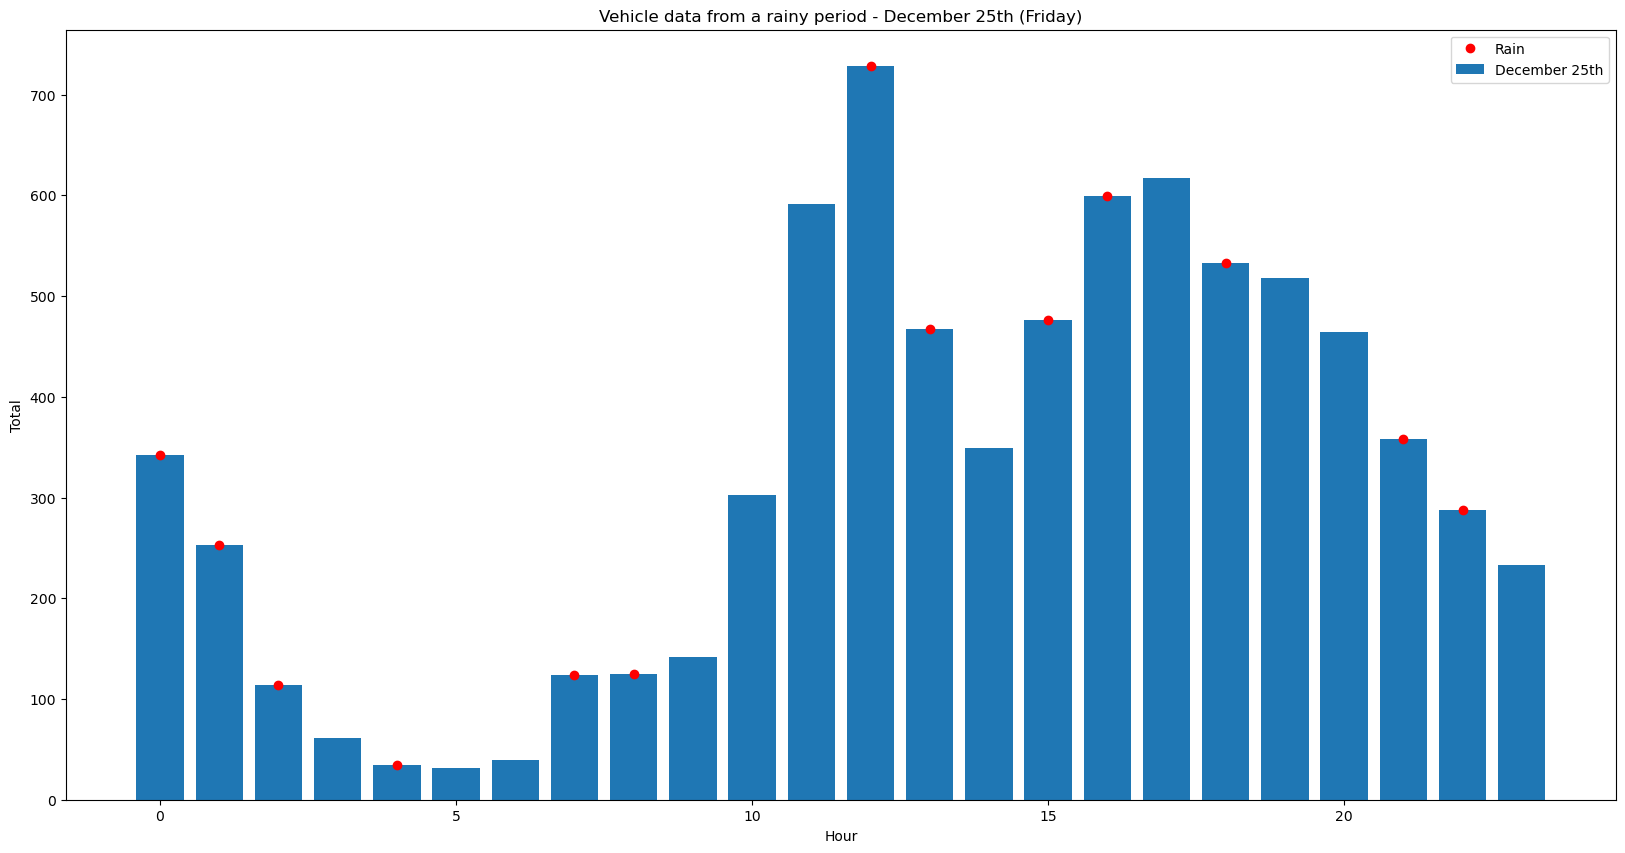

In [37]:
# get vehicle data for december 25th (no school)
dec_25 = df[df.index > '2022-12-24 23:00:00']
dec_25 = dec_25[dec_25.index < '2022-12-26 00:00:00']
dec_25 = dec_25.groupby(dec_25.index).sum()
dec_25

# agregate by hour
dec_25.index = pd.to_datetime(dec_25.index, format='%H')
dec_25.index = dec_25.index.hour
dec_25


# plot
plt.figure(figsize=(20,10))
plt.bar(dec_25.index, dec_25['total'], label='December 25th')
# make the line red for the rain (hours: 0, 1, 2, 4, 7, 8, 12, 13, 15, 16, 18, 21, 22 )
plt.plot([0, 1, 2, 4, 7, 8, 12, 13, 15, 16, 18, 21, 22], [dec_25['total'][0], dec_25['total'][1], dec_25['total'][2], dec_25['total'][4], dec_25['total'][7], dec_25['total'][8], dec_25['total'][12], dec_25['total'][13], dec_25['total'][15], dec_25['total'][16], dec_25['total'][18], dec_25['total'][21], dec_25['total'][22]], 'ro', label='Rain')
plt.title('Vehicle data from a rainy period - December 25th (Friday)')  
plt.xlabel('Hour')
plt.ylabel('Total')
plt.legend()
plt.show()



In [38]:
# check the weather on Setpember
we = data_weather[data_weather['dt'] >= '2022-09-01 00:00:00']
we = we[we['dt'] <= '2022-09-30 00:00:00']
we['weather'].value_counts()

# remove the rain data
we = we[we['weather'] != 'Rain']
we['weather'].value_counts()
we 

,dt,weather
2299,2022-09-01 00:00:00,Clouds
2300,2022-09-01 00:00:00,Clouds
2301,2022-09-01 01:00:00,Clouds
2302,2022-09-01 02:00:00,Clear
2303,2022-09-01 03:00:00,Clear
...,...,...
3021,2022-09-29 21:00:00,Clear
3022,2022-09-29 22:00:00,Clear
3023,2022-09-29 23:00:00,Clear
3024,2022-09-30 00:00:00,Clear


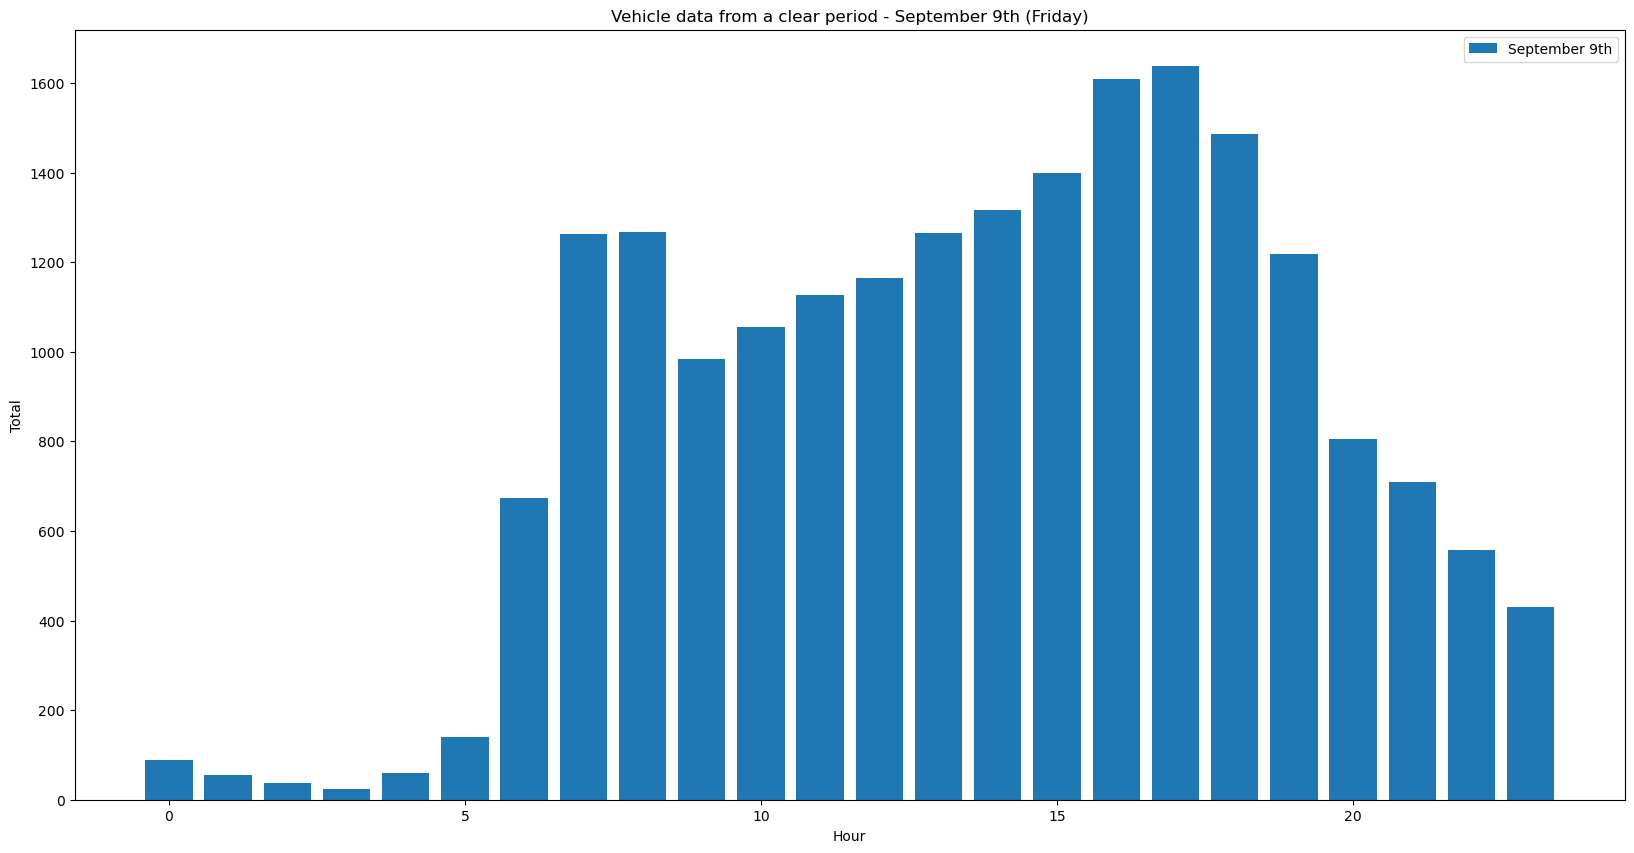

In [39]:
# get vehicle data for september 9th
veh4 = df[df.index > '2022-09-08 23:00:00']
veh4 = veh4[veh4.index < '2022-09-10 00:00:00']
veh4 = veh4.groupby(veh4.index).sum()
veh4

# agregate by hour
veh4.index = pd.to_datetime(veh4.index, format='%H')
veh4.index = veh4.index.hour
veh4


# plot
plt.figure(figsize=(20,10))
plt.bar(veh4.index, veh4['total'], label='September 9th')
plt.title('Vehicle data from a clear period - September 9th (Friday)')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.legend()
plt.show()


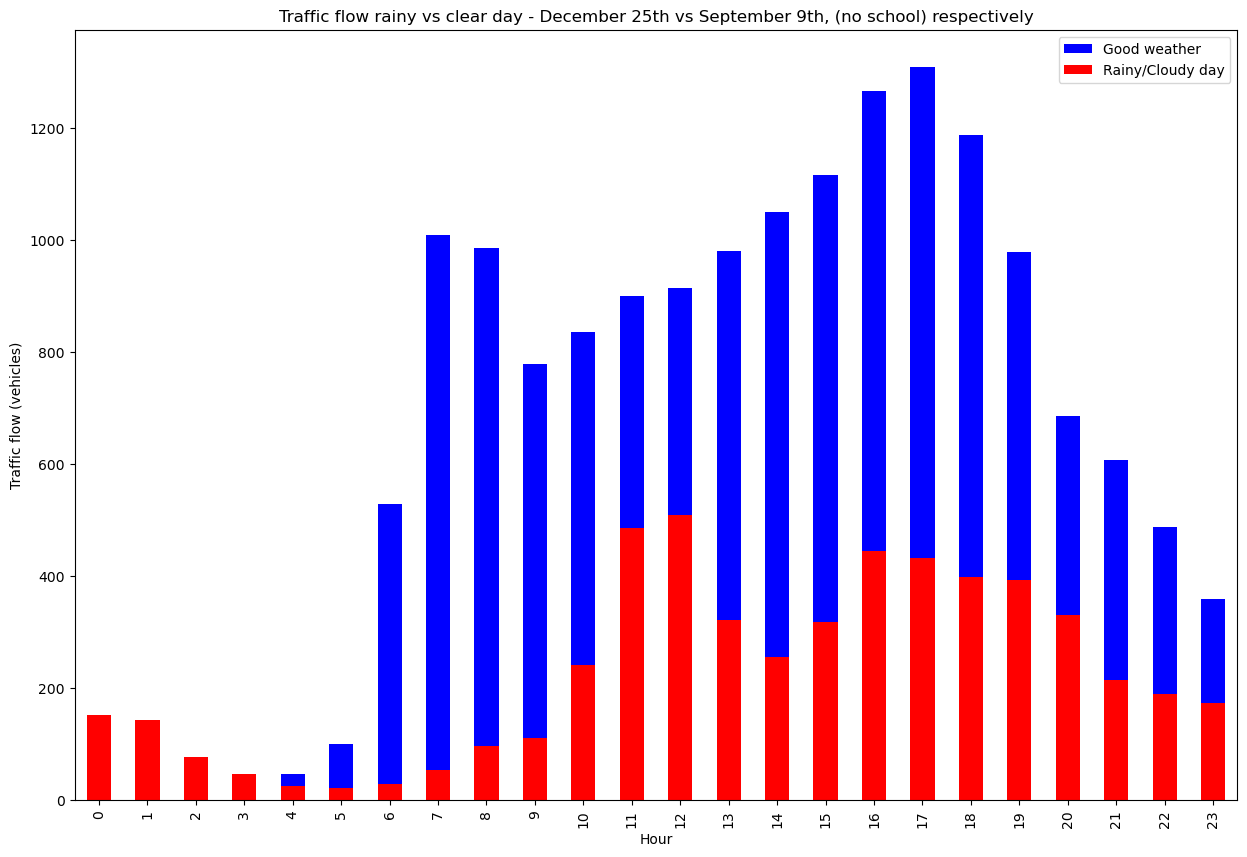

In [55]:
# compare
veh4.groupby(veh4.index).sum()['vehiclelight'].plot(kind='bar', legend=True, figsize=(15, 10), color='blue')
dec_25.groupby(dec_25.index).sum()['vehiclelight'].plot(kind='bar', legend=True, figsize=(15, 10), color='red')
plt.title('Traffic flow rainy vs clear day - December 25th vs September 9th, (no school) respectively')
plt.legend(['Good weather', 'Rainy/Cloudy day'])
plt.xlabel('Hour')
plt.ylabel('Traffic flow (vehicles)')
plt.show()


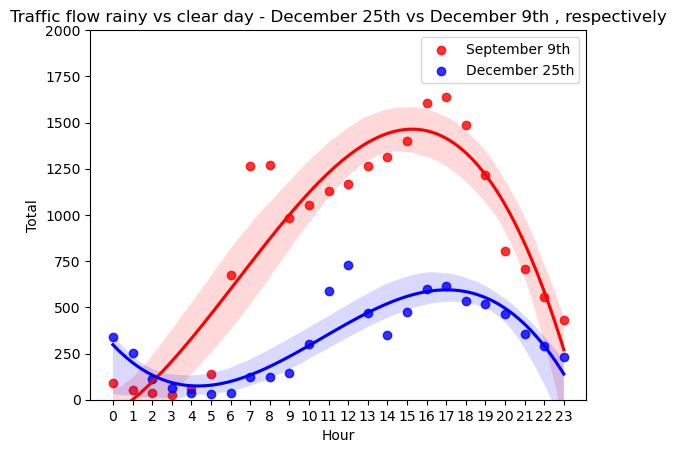

In [51]:
import seaborn as sns

sns.regplot(x=veh4.index, y=veh4['total'], data=veh4, label='September 9th', color='red', marker='o', order=3)
sns.regplot(x=dec_25.index, y=dec_25['total'], data=dec_25, label='December 25th', color='blue', marker='o', order=3)
plt.title('Traffic flow rainy vs clear day - December 25th vs December 9th , respectively')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylim(-0, 2000)
plt.ylabel('Total')
plt.legend()
plt.show()



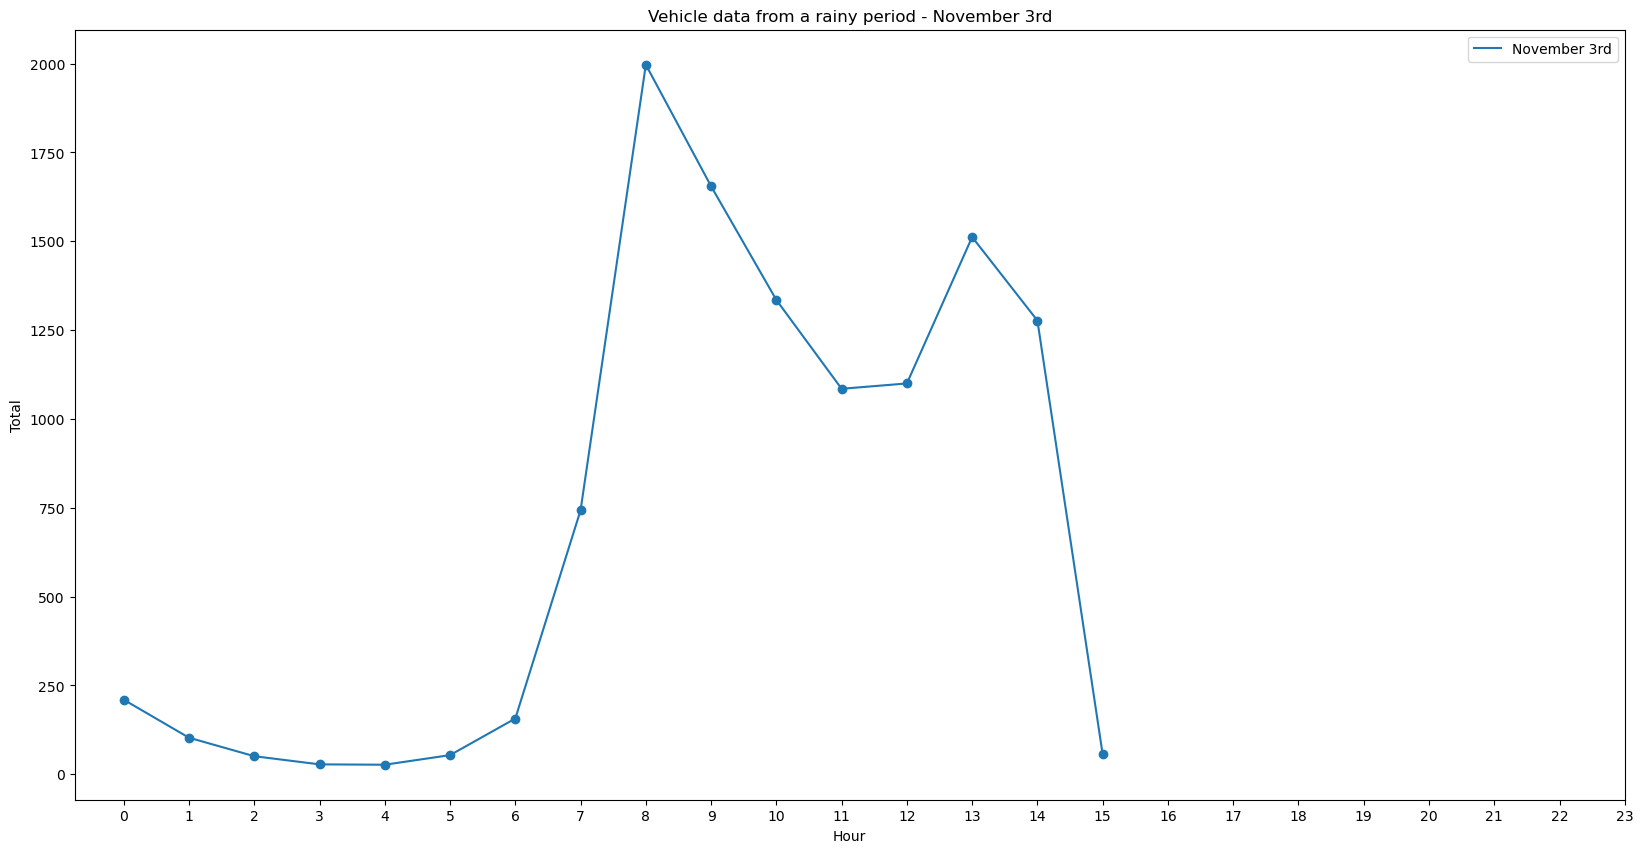

In [42]:

# 3rd November - Rain

x_3rd = x[x['dt'] >= '2022-11-03 00:00:00']
x_3rd = x_3rd[x_3rd['dt'] < '2022-11-04 00:00:00']
x_3rd

# get the vehicle data for the 3rd of November
x = df[df.index >= '2022-11-03 00:00:00']
data_3rd = x[x.index < '2022-11-04 00:00:00']

# agregate by hour
data_3rd = data_3rd.groupby(data_3rd.index).sum()
data_3rd

# now lets plot by hour
# keep only the hour value
# convert the index to datetime
data_3rd.index = pd.to_datetime(data_3rd.index, format='%H')

data_3rd.index = data_3rd.index.hour


#plot the data show the points
plt.figure(figsize=(20,10))
plt.scatter(data_3rd.index, data_3rd['total'])
plt.plot(data_3rd.index, data_3rd['total'], label='November 3rd')
plt.title('Vehicle data from a rainy period - November 3rd')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()



In [43]:
# check weather on 29th September

x = data_weather[data_weather['dt'] >= '2022-09-29 00:00:00']
x = x[x['dt'] < '2022-09-30 00:00:00']
x['weather'].value_counts()
x


,dt,weather
2999,2022-09-29 00:00:00,Clouds
3000,2022-09-29 00:00:00,Clouds
3001,2022-09-29 01:00:00,Clouds
3002,2022-09-29 02:00:00,Clouds
3003,2022-09-29 03:00:00,Clouds
3004,2022-09-29 04:00:00,Clouds
3005,2022-09-29 05:00:00,Clouds
3006,2022-09-29 06:00:00,Clouds
3007,2022-09-29 07:00:00,Clouds
3008,2022-09-29 08:00:00,Rain


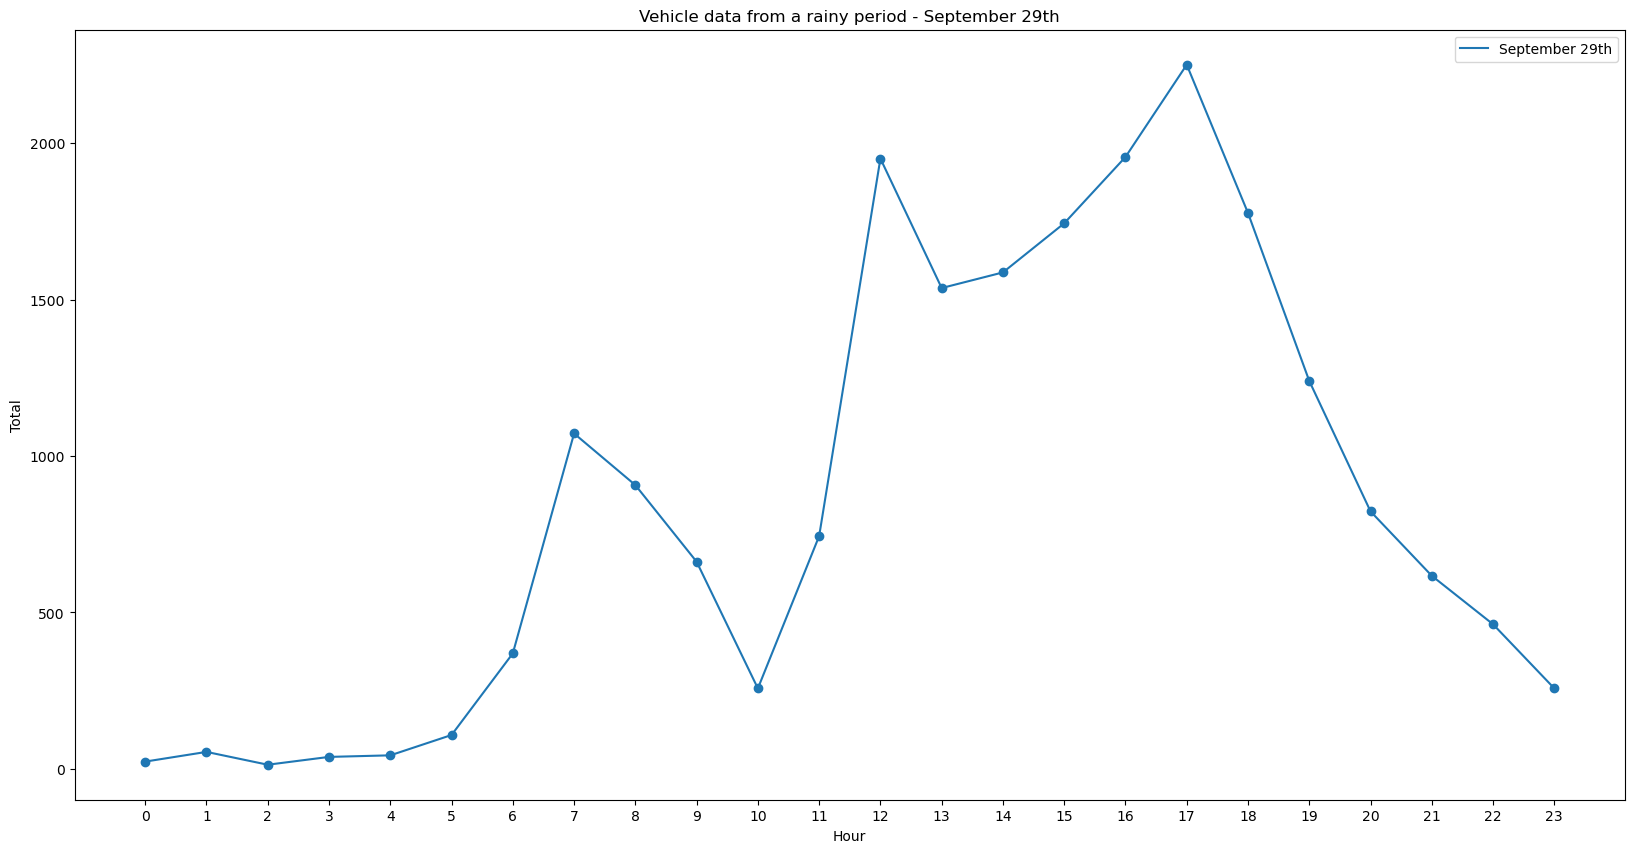

In [44]:

# get the vehicle data for the 29th of September
x = df[df.index >= '2022-09-29 00:00:00']
data_29th = x[x.index < '2022-09-30 00:00:00']

# agregate by hour
data_29th = data_29th.groupby(data_29th.index).sum()
data_29th

# now lets plot by hour
# keep only the hour value
# convert the index to datetime
data_29th.index = pd.to_datetime(data_29th.index, format='%H')

data_29th.index = data_29th.index.hour


#plot the data show the points
plt.figure(figsize=(20,10))
plt.scatter(data_29th.index, data_29th['total'])
plt.plot(data_29th.index, data_29th['total'], label='September 29th')
plt.title('Vehicle data from a rainy period - September 29th')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()

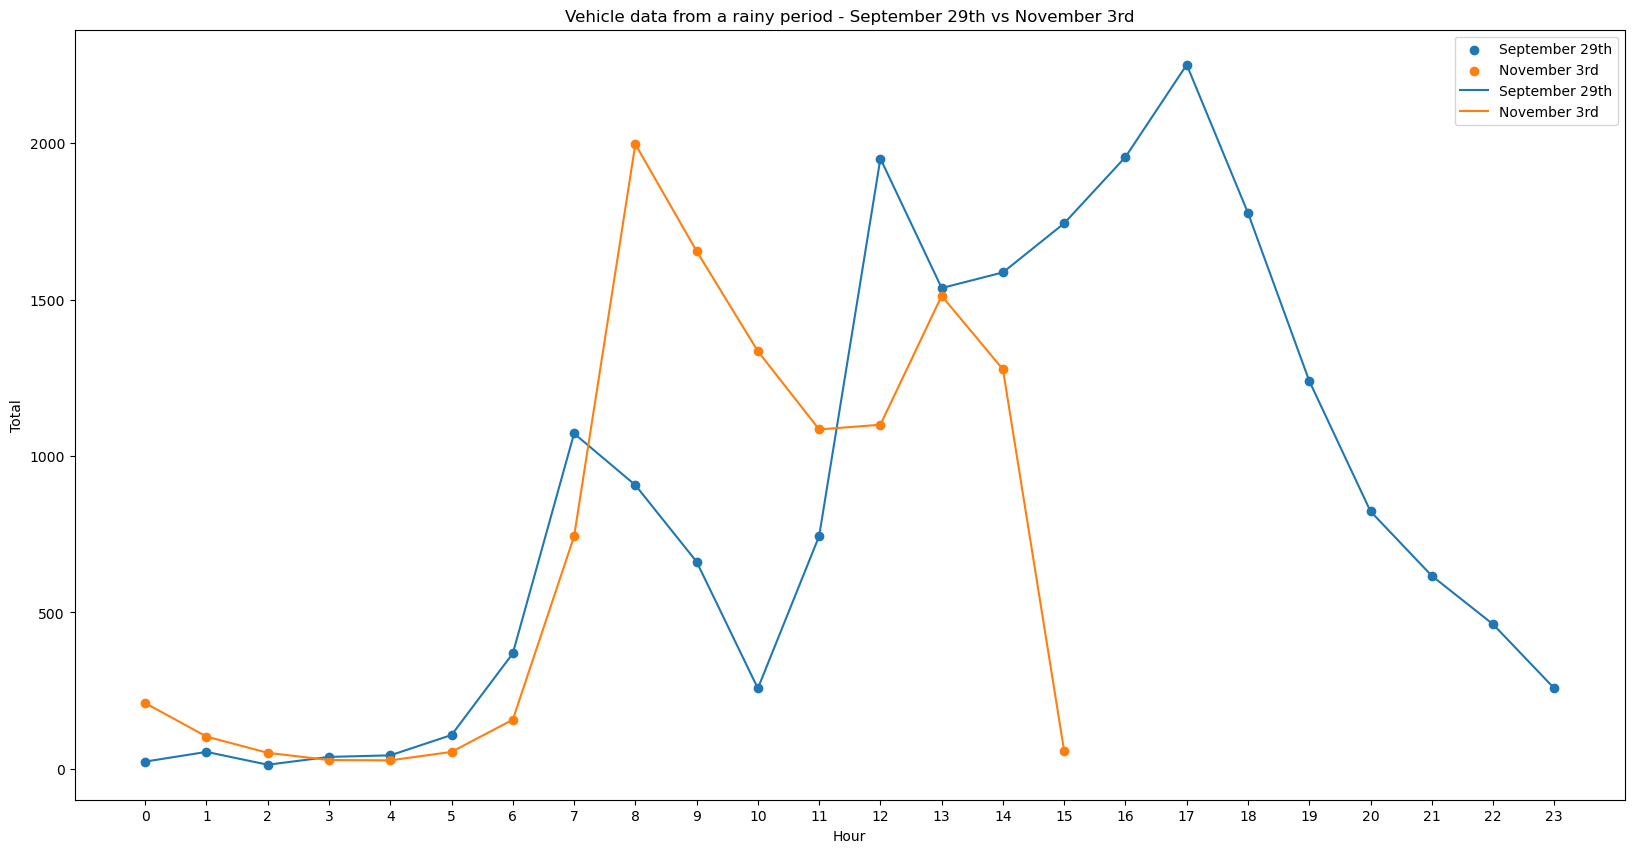

In [45]:
# plot both days
plt.figure(figsize=(20,10))
plt.scatter(data_29th.index, data_29th['total'], label='September 29th')
plt.scatter(data_3rd.index, data_3rd['total'], label='November 3rd')
plt.plot(data_29th.index, data_29th['total'], label='September 29th')
plt.plot(data_3rd.index, data_3rd['total'], label='November 3rd')
plt.title('Vehicle data from a rainy period - September 29th vs November 3rd')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Total')
plt.legend()
plt.show()

    

# bad weather school vs bad weather no school;

In [46]:
# check the weather on November 

x = data_weather[data_weather['dt'] >= '2022-11-01 00:00:00']
x = x[x['dt'] < '2022-11-15 00:00:00']
x['weather'].value_counts()

# keep only the rain data
x = x[x['weather'] == 'Rain']
x

,dt,weather
3872,2022-11-02 22:00:00,Rain
3873,2022-11-02 23:00:00,Rain
3874,2022-11-03 00:00:00,Rain
3875,2022-11-03 00:00:00,Rain
3876,2022-11-03 01:00:00,Rain
3877,2022-11-03 02:00:00,Rain
3878,2022-11-03 03:00:00,Rain
3879,2022-11-03 04:00:00,Rain
3880,2022-11-03 05:00:00,Rain
3881,2022-11-03 06:00:00,Rain


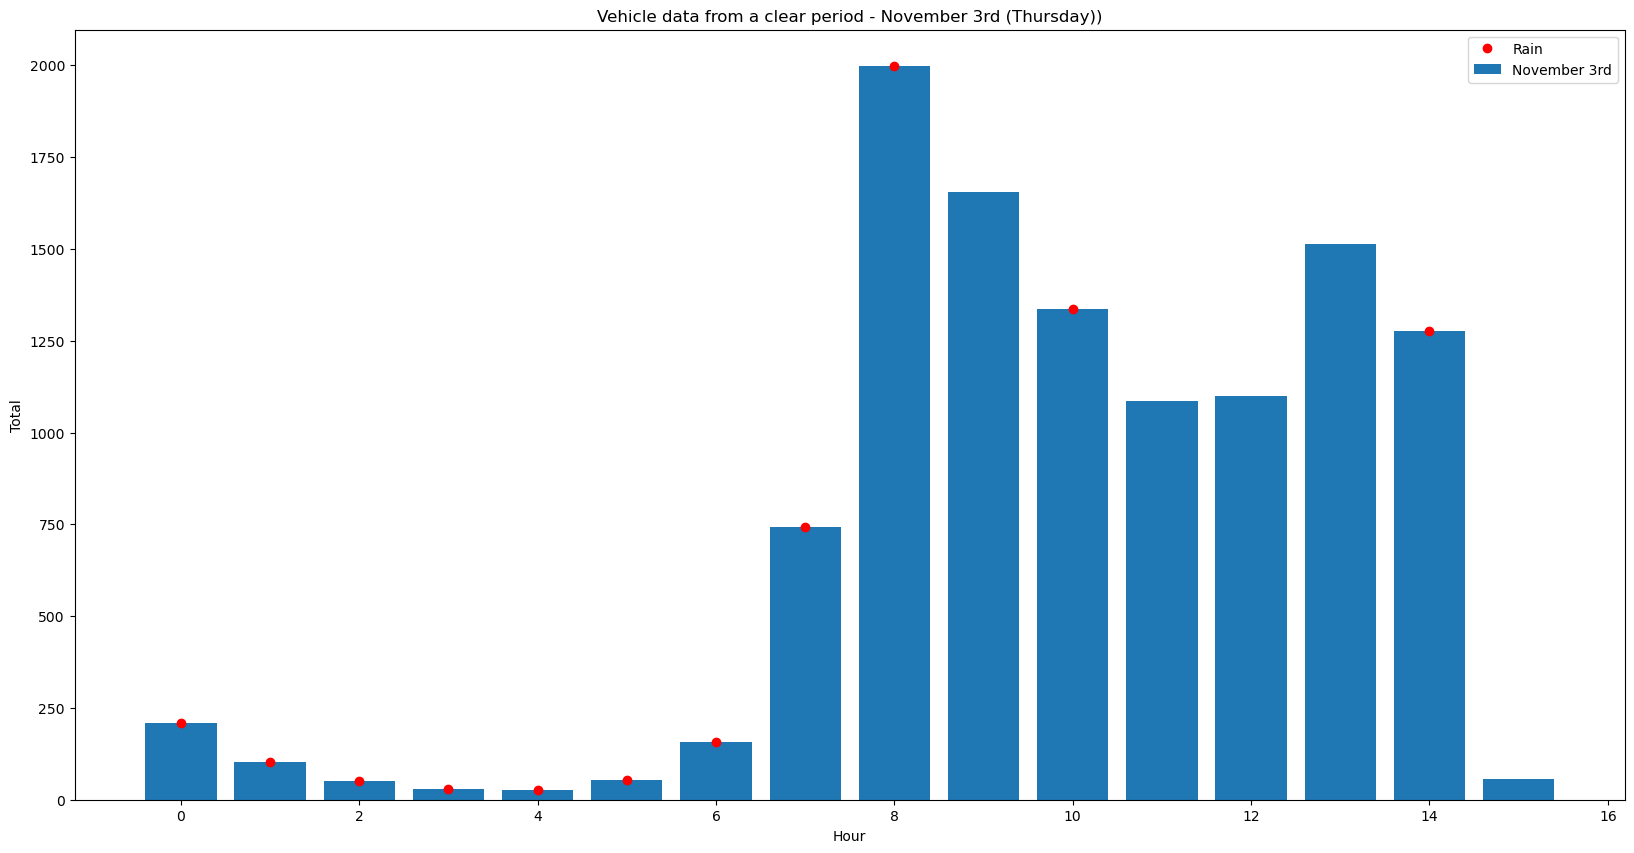

In [47]:
# get the vehicle data for the 3rd of november (thursday) (bad weather school day)
veh3 = df[df.index > '2022-11-02 23:00:00']
veh3 = veh3[veh3.index < '2022-11-04 00:00:00']
veh3 = veh3.groupby(veh3.index).sum()
veh3

# agregate by hour
veh3.index = pd.to_datetime(veh3.index, format='%H')
veh3.index = veh3.index.hour
veh3

# plot
plt.figure(figsize=(20,10))
plt.bar(veh3.index, veh3['total'], label='November 3rd')
# plot the rain dots on top (hours: 0, 1,2 ,3,4,5,6,7,8, 10, 14)
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14], [veh3['total'][0], veh3['total'][1], veh3['total'][2], veh3['total'][3], veh3['total'][4], veh3['total'][5], veh3['total'][6], veh3['total'][7], veh3['total'][8], veh3['total'][10], veh3['total'][14]], 'ro', label='Rain')

plt.title('Vehicle data from a clear period - November 3rd (Thursday))')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.legend()
plt.show()


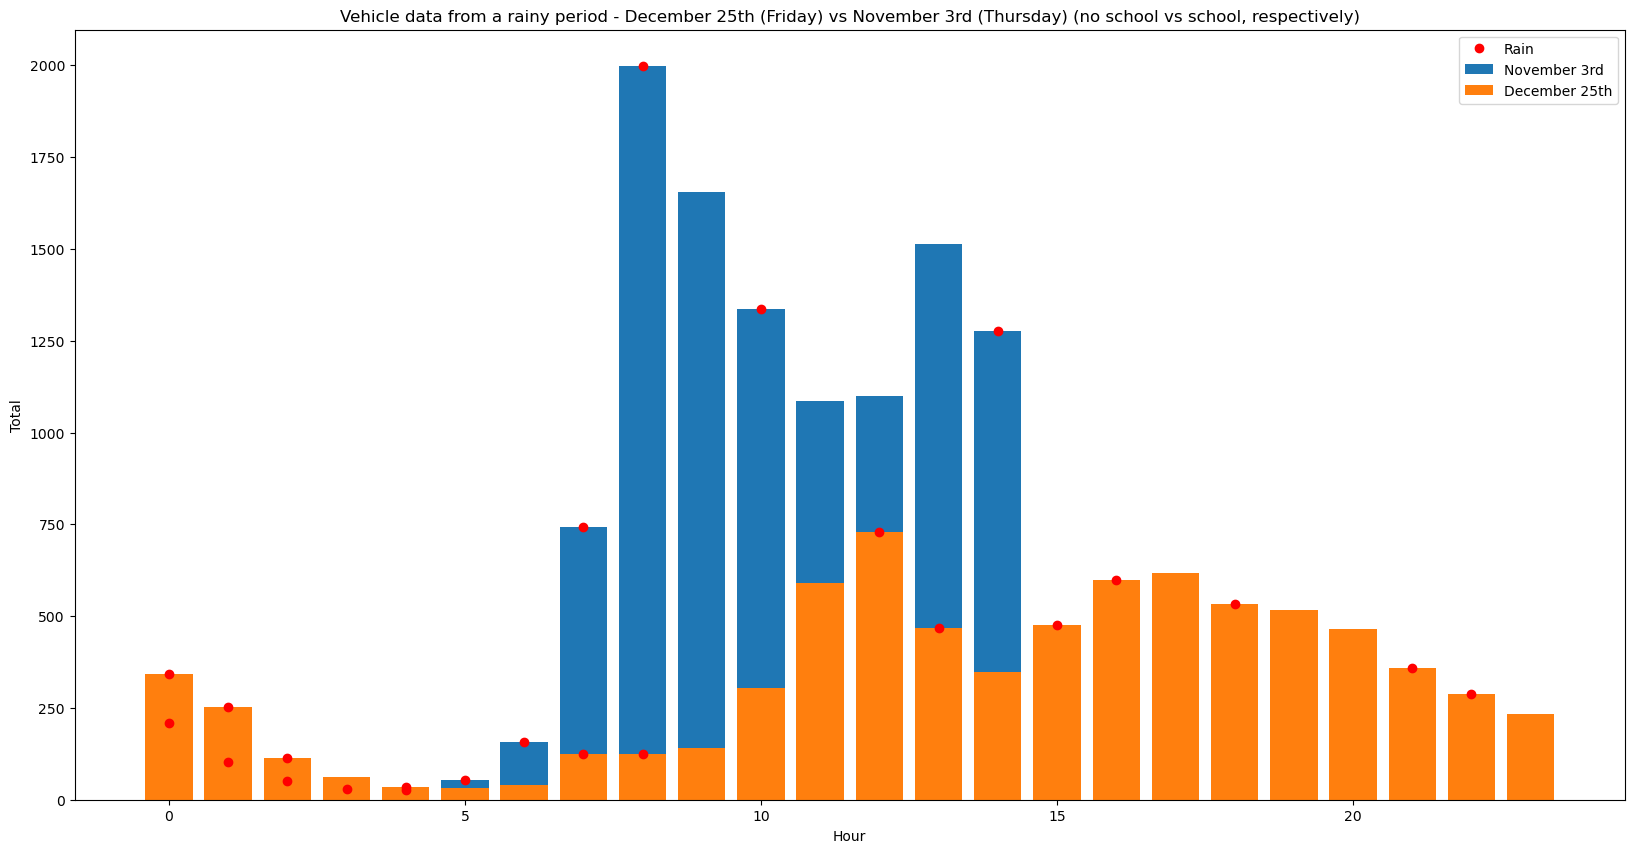

In [48]:
# bad weather no school he have 25th December
# bar plot with bar side by side
plt.figure(figsize=(20,10))
plt.bar(veh3.index, veh3['total'], label='November 3rd')
# make the line red for the rain (hours: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14 )
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14], [veh3['total'][0], veh3['total'][1], veh3['total'][2], veh3['total'][3], veh3['total'][4], veh3['total'][5], veh3['total'][6], veh3['total'][7], veh3['total'][8], veh3['total'][10], veh3['total'][14]], 'ro')

plt.bar(dec_25.index, dec_25['total'], label='December 25th')
# make the line red for the rain (hours: 0, 1, 2, 4, 7, 8, 12, 13, 15, 16, 18, 21, 22 )
plt.plot([0, 1, 2, 4, 7, 8, 12, 13, 15, 16, 18, 21, 22], [dec_25['total'][0], dec_25['total'][1], dec_25['total'][2], dec_25['total'][4], dec_25['total'][7], dec_25['total'][8], dec_25['total'][12], dec_25['total'][13], dec_25['total'][15], dec_25['total'][16], dec_25['total'][18], dec_25['total'][21], dec_25['total'][22]], 'ro', label='Rain')
plt.title('Vehicle data from a rainy period - December 25th (Friday) vs November 3rd (Thursday) (no school vs school, respectively)')  
plt.xlabel('Hour')
plt.ylabel('Total')
plt.legend()
plt.show()







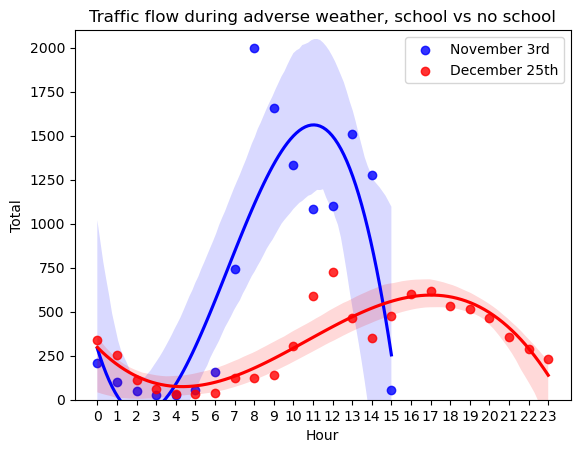

In [49]:
import seaborn as sns

sns.regplot(x=veh3.index, y=veh3['total'], data=veh3, label='November 3rd', color='blue', marker='o', order=3)
sns.regplot(x=dec_25.index, y=dec_25['total'], data=dec_25, label='December 25th', color='red', marker='o', order=3)
plt.title('Traffic flow during adverse weather, school vs no school')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylim(-0, 2100)
plt.ylabel('Total')
plt.legend()
plt.show()
